## 소셜 모임 사이트 분석을 통한 HOT한 모임(교육) 분석

- 참고: 사이트 (https://www.onoffmix.com/)

### 크롤링을 통한 외부 데이터 소싱(sourcing)

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import datetime

201834번 인덱스 강의 부터 218134 인덱스 까지의 정보를 긁어 옵니다.

In [15]:
start = 208134
end = 218134

In [16]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36'
}

## Test Code

In [17]:
page_num=1

In [18]:
url = "https://www.onoffmix.com/event/{}".format(page_num)
page = requests.get(url, headers=headers)
soup = BeautifulSoup(page.content, 'html.parser')
_type = soup.find('span', class_='category_type')
if _type:
    _type = _type.text
    
_pay = soup.find('span', class_='payment_type')
if _pay:
    _pay = _pay.text

## Crawling

In [19]:
page_num_list = []
title_list = []
date_list = []
total_list = []
avail_list = []
type_list = []
pay_list = []

for page_num in range(start, end):
    url = "https://www.onoffmix.com/event/{}".format(page_num)
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')
    _body = soup.find('body')
    if _body:
        _title = soup.find('h3', class_='event_title')
        if not _title:
            continue
        _title = _title.text.strip()
        _type = soup.find('span', class_='category_type')
        if _type:
            _type = _type.text

        _pay = soup.find('span', class_='payment_type')
        if _pay:
            _pay = _pay.text
        _date = soup.find('p', class_='description date').text
        _total = soup.select(".total .number_txt")
        if not _total:
            continue
        _total = _total[0].text.strip()
        avail = soup.select(".available .number_txt")
        if len(avail) > 0:
            _available = avail[0].text
        else:
            _available = 0
        print(page_num, _title, _date, _total, _available, _type, _pay)
        page_num_list.append(page_num)
        title_list.append(_title)
        date_list.append(_date)
        total_list.append(_total)
        avail_list.append(_available)
        type_list.append(_type)
        pay_list.append(_pay)

208135 2020 유망 비전 블록체인 프로젝트 투자설명회 2020.2.19 (수) 14:00 ~ 16:00 300 0 세미나/컨퍼런스 무료
208137 인테리어교육 2020.2.19 (수) 11:30 ~ 12:00 30 0 교육 무료
208138 프로그래밍교육양성<유료> 2020.2.19 (수) 11:30 ~ 2020.2.26 (수) 12:00 100 0 교육 무료
208139 최성호가 함께 하는 1인 기업 토크 모임 2020.2.7 (금) 15:00 ~ 17:00 6 0 소모임/친목행사 유료
208143 나는 블로그로 직접 이북을 판다 2020.2.7 (금) 19:00 ~ 21:00 6 0 강연 유료
208144 나의 개 같은 사업이야기 2020.2.7 (금) 16:00 ~ 18:00 10 0 강연 유료
208145 [네트워크 관리사 2급 필기] 4일만에 취득하기! 2020.2.4 (화) 10:00 ~ 2020.2.5 (수) 18:00 20 0 교육 유료
208149 더리더 독서모임 2020.2.8 (토) 14:00 ~ 16:00 20 0 소모임/친목행사 유료
208150 Art&DigitalTech 컨퍼런스&쇼케이스 #Platform@Digital Revolution 2020.2.7 (금) 13:00 ~ 17:30 230 0 세미나/컨퍼런스 무료
208151 [TOAST FORWARD] GAME TALK 2020.2.20 (목) 14:00 ~ 15:40 40 0 교육 무료
208152 인스타그램에서 쇼핑몰 홍보하기(2/7) - 원데이클래스 2020.2.7 (금) 20:00 ~ 22:00 3 0 교육 유료
208153 모바일 결제 쇼핑몰 제작기법 with 워드프레스(2/14) - 원데이클래스 2020.2.14 (금) 14:00 ~ 15:00 3 0 교육 유료
208154 (2/18 관리자) 2020 스타트업 임직원 역량강화 2020.2.18 (화) 10:00 ~ 17:00 40 0 교육 무료
208155 (2/19 직원) 2020 스타트업 임직원 역량강화

208272 다음 건매니아카페 주최 2차대전 재연 리인액트먼트 에어소프트 서바이벌게임 번개모임 2020.2.22 (토) 10:00 ~ 17:00 30 0 취미활동 유료
208273 야, 너두 할 수 있어 ! 2020.2.7 (금) 18:00 ~ 20:00 50 0 강연 유료
208275 월급학개론_재테크 세미나 2020.2.15 (토) 15:00 ~ 17:00 15 0 강연 무료
208276 [당신의 인생 스토리를 들려주시겠습니까?] 2020.2.4 (화) 19:00 ~ 20:00 2 0 강연 유료
208279 스타디) 플러터 앱개발 스터디 모임 2020.3.4 (수) 19:00 ~ 2020.4.29 (수) 21:00 6 0 교육 무료
208280 워드프레스+쇼핑몰 4시간 속성 마스터(2/18) - 원데이클래스 2020.2.18 (화) 09:00 ~ 13:00 3 0 교육 유료
208281 (부산)네이버 블로그 4시간만에 왕초보탈출(5/10)-원데이클래스 2020.5.10 (일) 14:00 ~ 18:00 3 0 교육 유료
208284 특별한 삶을 살고 싶은 분께만 드리는 후크의 제안 2020.2.4 (화) 16:00 ~ 16:30 6 0 기타 유료
208285 콩나물도 모르면서 하루만에 작곡하기 2020.2.15 (토) 14:00 ~ 16:00 6 0 강연 유료
208286 (대구) 더욱 강력해진 하루만에 책쓰기 2020.2.8 (토) 13:00 ~ 15:00 4 0 강연 유료
208288 가장 빨리 강사가 되는 방법 - 어떤 강의 2020.2.7 (금) 11:00 ~ 13:00 12 0 강연 유료
208289 2시간의 인생플랜 with 사주타로(2/19) 2020.2.19 (수) 10:00 ~ 22:00 3 0 기타 유료
208290 (부산)2시간의 인생플랜 with 사주타로(2/15) 2020.2.15 (토) 10:00 ~ 22:00 4 0 기타 유료
208291 [대학입시 핵심전략 2021] 출간기념 저자강연회 2020.2.15 (토) 19:00 ~ 21

208435 연기: 멘토링스쿨: 건축가가 들려주는 '공간, 브랜딩 스토리' 2020.3.28 (토) 17:30 ~ 19:30 30 0 강연 무료
208437 파워BI_기본과정 특강 (대학생/대학원생 특별할인 적용) 2020.2.16 (일) 13:00 ~ 19:00 15 0 교육 유료
208438 사회초년생 월급관리 & 실전운용 재테크 세미나 2020.2.23 (일) 14:00 ~ 16:00 20 0 세미나/컨퍼런스 무료
208440 코드팟' 팟캐스트 인터뷰 2020.2.5 (수) 16:00 ~ 17:30 5 0 방송/연예 무료
208441 하루만에 책쓰기 춘천 미션데이 2020.2.10 (월) 09:00 ~ 21:00 15 0 이벤트/파티 유료
208442 (부산) 해적들의 창업이야기 (창업비용 99% 절감 프로젝트) 2020.2.11 (화) 14:00 ~ 16:00 6 0 교육 유료
208444 재테크 세미나: 미래를 바꾸는 시간 2020.2.8 (토) 18:00 ~ 20:00 20 0 세미나/컨퍼런스 무료
208445 건강검진 대상자 모집합니다.(안과,성형외과,산부인과) 2020.2.6 (목) 17:00 ~ 18:00 10 0 기타 무료
208448 서사모- 서로의 사업을 도와주는 모임에 당신을 초대 합니다 2020.2.11 (화) 19:00 ~ 21:00 20 0 소모임/친목행사 무료
208451 FX마진, 해외선물 꾸준히 30틱 수익내기(100세시대 리스크없이 현실적 대안 만들기) 2020.2.9 (일) 14:00 ~ 16:00 20 0 교육 무료
208453 (부천옥길, 오후시간) IT보안 진로 QA 특강 (모의해킹, 침해사고대응분석 등) 2020.2.11 (화) 14:00 ~ 16:00 8 0 교육 유료
208455 2020 인스타그램 완전정복 세미나 <채널 운영과 UGC 편> 2020.2.12 (수) 14:00 ~ 18:00 200 0 세미나/컨퍼런스 유료
208456 (부산) 네이버블로그 프로젝트로 수입 만들기 2020.2.9 (일) 10:00 

208612 [61회 컬스업]2020년 정부지원사업으로 창업에 성공하기 위한 실전 창업 워크샵 2020.2.22 (토) 10:00 ~ 2020.2.23 (일) 17:00 40 0 세미나/컨퍼런스 무료
208613 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나19 2020.2.23 (일) 13:30 ~ 14:30 5 0 교육 유료
208614 사회적경제를 활용한 왕초보 창업자를 위한 창업 실무과정 2020.2.22 (토) 10:00 ~ 11:30 5 0 교육 유료
208615 사회적경제를 활용한 최대 5억원까지 무상으로 지원하는 R&D(기술개발)자금 받는 법&신청서 작성법 세미나!1 2020.2.17 (월) 13:00 ~ 14:30 5 0 교육 유료
208616 사회적경제를 활용한 최대 5억원까지 무상으로 지원하는 R&D(기술개발)자금 받는 법&신청서 작성법 세미나!2 2020.2.19 (수) 14:30 ~ 15:30 5 0 교육 유료
208617 중고책 부업으로 월200만원 직장인들의 모임=중고책창업교육센터 2020.2.12 (수) 19:00 ~ 21:00 8 0 세미나/컨퍼런스 유료
208618 중고책 부업으로 월200만원 직장인들의 모임=중고책창업교육센터 2020.2.19 (수) 19:00 ~ 21:00 8 0 세미나/컨퍼런스 유료
208620 글로벌 무역셀러 1인 창업 <알리바바 셀러 특강> 2020.3.4 (수) 13:00 ~ 14:30 3 0 교육 유료
208622 <도시재생> in서울 건물주 되기 특강 2020.3.5 (목) 19:30 ~ 21:30 50 0 세미나/컨퍼런스 유료
208625 [웹프로그램 무료교육] 자바와 C언어 입문자를 위한 자바개발자 무료교육 2020.4.28 (화) 09:00 ~ 2020.10.8 (목) 18:00 10 0 교육 무료
208626 초보자도 10배 수익 내는 '10배경매 특강' 2020.3.24 (화) 19:30 ~ 21:30 45 0 교육 무료
208628 [C언어, 자바국비지원] C와 JAV

208829 [2020.3.17(화)] 쿠팡MD와 함께하는 쿠팡 파워셀러 전략법, 저녁 7~11시 2020.3.17 (화) 19:00 ~ 23:00 20 0 교육 유료
208831 [바로오늘!!!! 무료강연] 출간기획의 神(신) 2020.2.10 (월) 19:30 ~ 21:00 10 0 강연 무료
208833 인문학 특강(뇌과학이 알려준 새로운생각) 2020.2.17 (월) 10:30 ~ 13:00 30 0 교육 무료
208834 인문학 특강(뇌과학이 알려준 새로운생각) 2020.2.17 (월) 19:30 ~ 21:00 30 0 교육 무료
208835 DLP 3D프린터 무료장비교육 2020.2.20 (목) 18:30 ~ 19:30 5 0 교육 무료
208837 해적들의 '유니콘 프로젝트' 2020.2.14 (금) 14:00 ~ 16:00 7 0 세미나/컨퍼런스 유료
208838 가장 빨리 강사가 되는 방법 - 어떤 강의 2020.2.14 (금) 11:00 ~ 13:00 12 0 강연 유료
208841 [무료] [3월] 커플과 신혼부부를 위한 스마트한 재테크 2020.3.11 (수) 19:30 ~ 21:30 20 0 세미나/컨퍼런스 무료
208842 스포츠 마케팅 강좌 2020.2.14 (금) 19:30 ~ 21:00 10 0 교육 유료
208843 술술 풀리는 내 인생 1+1~ 아주 특별한 몸맘 과외수업 2020.2.10 (월) 19:30 ~ 22:30 8 0 교육 유료
208845 친밀한 관계를 만드는 소통의 비밀~Only One 2020.2.23 (일) 15:00 ~ 2020.3.8 (일) 18:30 8 0 교육 유료
208846 [책쓰기] 정강민 작가 무료공개특강(3기 모집) "책, 누구나 쓸 수 있다" 2020.2.13 (목) 19:30 ~ 21:30 15 0 교육 무료
208848 단기 핵심코스,아로마 강사, 테라피스트 창업반 과정 클래스(온/오프라인 과정) 2020.3.1 (일) 11:00 ~ 2020.3.29 (일) 14:00 10 0 교육 유료


209018 [구글스타트업캠퍼스] gPause:명상하는 창업가들 "위즈덤 2.0 코리아 특집" 2020.2.18 (화) 19:00 ~ 21:00 150 0 강연 무료
209020 구디나비 독서모임 2020.4.4 (토) 08:00 ~ 10:00 5 0 소모임/친목행사 유료
209023 쏀놈들의 전성시대 <KETTLE FIT> 2020.2.22 (토) 14:00 ~ 17:30 30 0 세미나/컨퍼런스 유료
209025 [인장사 클럽 2월 신청서] 2020.2.25 (화) 15:00 ~ 17:00 70 0 강연 무료
209026 2020년 2월 10일 오후 2:22 / 정영진님이 개설한 모임 2020.2.27 (목) 14:30 ~ 2020.2.28 (금) 15:00 5 0 교육 무료
209027 [원데이 클래스] 개념없이 시험공부 끝내기 2020.2.15 (토) 10:00 ~ 12:00 5 0 교육 유료
209028 추가모집3-(온라인장기) 보안입문자를 위한 모의해킹 실무 장기과정 26기 2020.2.12 (수) 15:00 ~ 15:30 3 0 교육 유료
209031 [삼성생명 VIP 초청세미나]12.16 부동산 대책 및 절세방안 2020.2.12 (수) 16:00 ~ 19:30 1 0 세미나/컨퍼런스 유료
209033 불만고객응대기법 2020.2.20 (목) 19:30 ~ 21:00 50 0 강연 유료
209036 피부관리 실기 연습 장소 대여 2020.3.29 (일) 10:00 ~ 19:00 10 0 패션/뷰티 유료
209040 1Day 특강 블로그 하루만에 끝내기 2020.2.15 (토) 11:00 ~ 13:00 10 0 세미나/컨퍼런스 유료
209043 [강사모집1] 2차 2020 상반기 지역아동센터 찾아가는 SW 코딩 교실 / ~2 .12(수) 12: 00 2020.3.2 (월) 12:00 ~ 2020.6.12 (금) 18:00 390 0 기타 무료
209052 업글인간 ; 성공 아닌 성장! 인생 업그레이드 강연 2020.2.15 (토) 16:00 ~ 1

209193 (경기창조경제혁신센터) 2020년 예비창업패키지 일반분야 사업설명회 2020.2.17 (월) 14:00 ~ 16:00 100 0 세미나/컨퍼런스 무료
209194 2020년 SW고성장클럽 200  온라인 사업설명회 2020.3.5 (목) 14:00 ~ 16:00 500 0 세미나/컨퍼런스 무료
209196 (상담)KUC1:1코디네이팅3개월과정 2020.2.12 (수) 18:30 ~ 19:00 1 0 기타 유료
209197 2020년 SW고성장클럽 200 사업설명회<충청권(대전)> 2020.2.27 (목) 15:00 ~ 17:00 90 0 세미나/컨퍼런스 무료
209198 2020년 SW고성장클럽 200 사업설명회<동남권(부산)> 2020.2.26 (수) 14:00 ~ 16:00 50 0 세미나/컨퍼런스 무료
209199 (2/15 부산) 정부지원금을 활용해 안전하게 기업경영하기(사업계획서 작성편) 2020.2.15 (토) 14:30 ~ 17:30 20 0 강연 유료
209200 오늘 반드시 창업하기 2020.2.19 (수) 10:00 ~ 13:00 10 0 강연 유료
209202 제83회 "호기심을 파는 강의" 2020.2.19 (수) 14:00 ~ 16:00 12 0 세미나/컨퍼런스 유료
209203 내 마음을 위한 그림심리 (마인드테라피) 2020.2.12 (수) 14:30 ~ 16:30 4 0 취미활동 유료
209205 내 마음을 위한 그림심리 (마인드테라피) 2020.2.19 (수) 14:30 ~ 16:30 4 0 취미활동 유료
209206 포토샵 기초반 (2020년 2기 / 왕초보를 위한 4주완성) 2020.2.18 (화) 15:30 ~ 17:30 4 0 교육 유료
209208 큐니버시티 학술회, "큐리어스 데이" 2020.2.15 (토) 10:00 ~ 12:00 12 0 세미나/컨퍼런스 유료
209209 대학교 자퇴생 및 휴학생 커뮤니티, 자휴넷! 2020.2.15 (토) 13:00 ~ 15:00 12 0 소모임/친목행사 유료
20921

209354 3월 평일세미나  [ BUY CHANGE 종목발표  ] 2020.3.4 (수) 19:00 ~ 21:00 40 0 기타 유료
209355 베트남 전문가와 함께 하는 베트남 비즈니스 독서모임 2020.2.29 (토) 10:00 ~ 12:00 20 0 교육 유료
209356 주니어 유튜버 지도사 자격증 세미나 - 2월 28일(금) 울산 2020.2.28 (금) 15:00 ~ 19:00 10 0 세미나/컨퍼런스 유료
209357 02.22(토) 낮 12시 창업경영중국세미나 :: 구글의 성공 방식 :: 2020.2.22 (토) 12:00 ~ 16:30 10 0 기타 무료
209358 02.18(화) 오후 2시 4차산업 혁명시대 1인기업 성공경영특강(서울) 2020.2.18 (화) 14:00 ~ 17:00 10 0 기타 무료
209361 [강사모집1] 3차 2020 상반기 지역아동센터 찾아가는 SW 코딩 교실 / ~2 .16(일) 23: 00 2020.3.2 (월) 10:00 ~ 2020.6.12 (금) 18:00 255 0 기타 무료
209363 제17차 세종국가리더십포럼 2020.2.19 (수) 15:00 ~ 17:00 50 0 세미나/컨퍼런스 무료
209364 PowerBI 더 알아보기! 원데이워크샵! 2020.2.19 (수) 10:00 ~ 17:00 15 0 교육 유료
209365 Self-Love Goddess Diary Workshop 2020.2.22 (토) 14:00 ~ 17:00 6 0 소모임/친목행사 유료
209367 월급관리 스터디 2020.2.23 (일) 14:00 ~ 15:30 10 0 세미나/컨퍼런스 무료
209378 일 매출 500만원에서 10개월에 1억을 만드는 노하우 전수! [독선생 박종윤 저자특강] 2020.2.20 (목) 19:00 ~ 22:00 50 0 교육 유료
209379 소상공인을 위한 유튜브 왕초보특강 2020.3.5 (목) 10:00 ~ 12:00 30 0 교육 무료
209380 #31 '심리학자 김태형'과 함께하

209530 하루만에 나만의 카카오톡 이미티콘 만들어 올리기! 2020.2.22 (토) 14:00 ~ 17:00 10 0 취미활동 유료
209531 [ 3/21 토 강남] 생존육아 조은화 ABC에서 원서읽기까지 2020.3.21 (토) 14:00 ~ 16:00 20 0 교육 유료
209532 봉준호 감독 스피치 따라잡기! 2020.2.15 (토) 14:00 ~ 16:00 3 0 강연 유료
209535 (부산) 네이버블로그 운영 메뉴얼 코칭 2020.2.22 (토) 11:00 ~ 13:00 1 0 교육 유료
209537 (기업 보안실무자/대학생/취업준비생) 웹 모의해킹_비전공자와 왕초보자를 위한 웹 취약점 진단 기술_저자직강 2020.2.29 (토) 10:00 ~ 16:00 20 0 교육 유료
209538 [네트워크 국비지원] 네트워크보안 엔지니어 실무자 양성과정 2020.3.16 (월) 09:00 ~ 2020.9.9 (수) 15:30 7 0 교육 무료
209539 [정보보안 국비지원] ICT기반 정보시스템보안 엔지니어 양성과정 2020.3.16 (월) 09:00 ~ 2020.9.9 (수) 15:30 10 0 교육 무료
209540 [아마존서버 국비지원] 아마존(AWS)서버 기반 아키텍쳐 설계 및 개발자 양성과정 2020.3.16 (월) 09:00 ~ 2020.9.9 (수) 15:30 8 0 교육 무료
209541 [해킹/해커 국비지원] 오픈소스기반 보안 취약점 분석 실무자 양성과정 2020.3.16 (월) 09:00 ~ 2020.9.9 (수) 15:30 10 0 교육 무료
209542 [자바 국비지원] 스프링프레임워크 기반의 자바(JAVA) 웹개발자 국비지원 취업과정 2020.4.13 (월) 09:30 ~ 2020.9.22 (화) 18:30 10 0 교육 무료
209543 [웹프로그램 무료교육] 자바와 C언어 입문자를 위한 자바개발자 무료교육 2020.4.28 (화) 09:00 ~ 2020.10.8 (목) 18:00 10 0 교육 무료
209544 [C언어, 

209668 메이커들을 위한 메이킹 파티, MAKE ALL NIGHT! 2020.2.25 (화) 17:00 ~ 19:00 50 0 기타 무료
209669 [목공예/원데이 클래스] 수공예 원목 도마 제작 2020.4.1 (수) 15:00 ~ 18:00 8 0 취미활동 유료
209670 [목공예/원데이 클래스] 수공예 원목 도마 제작 2020.3.22 (일) 14:00 ~ 17:00 3 0 취미활동 유료
209673 성공하는 세계 CEO들은 왜 매일 명상을 하는가? 2020.2.22 (토) 14:30 ~ 16:30 15 0 강연 무료
209674 빅데이터분석마케팅전문가 과정 2020.3.30 (월) 14:00 ~ 2020.8.31 (월) 18:00 20 0 교육 무료
209675 스쿨몬스터 놀라운 강의 1년 50주 수강권 2020.2.22 (토) 23:00 ~ 23:30 5 0 강연 유료
209677 미래를 바꾸는 시간 : 재테크 세미나 2020.2.22 (토) 16:00 ~ 18:00 20 0 기타 무료
209678 (부천) 노션을 활용한 홈페이지, 블로그 등 제작 입문 과정 2020.2.28 (금) 19:00 ~ 22:00 8 0 교육 유료
209679 스피치연습반 2020.2.18 (화) 10:00 ~ 12:00 10 0 교육 유료
209681 나만 모르는 재테크 2020.2.22 (토) 16:00 ~ 18:00 10 0 세미나/컨퍼런스 무료
209682 (오프라인,부천) 블로그를 활용한 마케팅 노하우 2020.2.25 (화) 14:00 ~ 16:00 8 0 교육 유료
209683 2020년 에리치 요양기관 인증평가 설명회 2020.3.21 (토) 13:00 ~ 2020.4.18 (토) 17:00 80 0 세미나/컨퍼런스 유료
209687 초보 유튜버들이 반드시 알아야 할 기초지식_4주클래스 2020.3.2 (월) 18:00 ~ 21:00 10 0 기타 유료
209688 매주 목요일 7시 C급영화 이야기하는 모임 2020.2.27 (목) 19:00 ~ 21:

209856 메가스터디컴퓨터아카데미 직장인 브이로그 만들기 세미나 2020.4.4 (토) 11:00 ~ 13:00 20 0 세미나/컨퍼런스 무료
209857 술술 풀리는 내 인생 1+1~ 몸맘 에너지 밸런싱 2020.2.25 (화) 10:30 ~ 2020.3.17 (화) 13:30 8 0 교육 유료
209858 친밀한 관계를 만드는 소통의 비밀~Only One 2020.2.23 (일) 14:30 ~ 2020.3.8 (일) 19:00 8 0 교육 유료
209859 메이커 스테이션 3D프린터 체험교육 2020.2.26 (수) 14:00 ~ 16:00 9 0 교육 무료
209860 워드프레스+쇼핑몰 4시간 속성 마스터(3/29, 오전반) - 원데이클래스 2020.3.29 (일) 09:00 ~ 13:00 3 0 교육 유료
209861 창의적 놀이교육법!! 놀이전문가 워크샵&설명회 2020.4.24 (금) 10:30 ~ 12:00 61 0 교육 유료
209862 워드프레스 3시간 속성 마스터하기(2/26, 저녁반) - 원데이클래스 2020.2.26 (수) 19:00 ~ 22:00 3 0 교육 유료
209863 메이커 스테이션 레이저커팅기 체험교육 2020.2.28 (금) 14:00 ~ 16:00 10 0 교육 무료
209864 스티브잡스형 놀이교육 일일 워크샵 2020.4.23 (목) 18:30 ~ 23:30 53 0 교육 유료
209865 책, 읽지만 말고 써라! 이혁백 작가의 <4시간 책 쓰기/출판 핵심 특강> 2020.2.29 (토) 13:00 ~ 17:00 3 0 강연 유료
209867 경남김해/부산 싱잉볼베이직코스 2020.3.15 (일) 13:00 ~ 17:30 15 0 교육 유료
209868 자기계발 특강. 나와 자녀의 인생을 바꾸는 자기 혁명 특강 2020.2.22 (토) 14:00 ~ 17:00 4 0 강연 유료
209869 Color Code 99-0913 : Color Name Choi Yeonjun 2020.2.29 (토) 12:00 ~ 2020.

210013 스마트스토어 창업 특강-아이템 소싱과 매출상승 전략.스마트스토어 마케팅 저자 직강 2020.3.18 (수) 19:00 ~ 22:00 10 0 교육 유료
210014 [3월8일]실무자를 위한 PPT 기획&디자인 템플릿 교육 2020.3.8 (일) 11:00 ~ 13:00 5 0 교육 유료
210018 화려한 도시! 미국 뉴욕으로 떠나는 한달살기 참가자 모집 2020.3.6 (금) 16:30 ~ 17:00 12 0 여행 유료
210020 [무료 디자인 씽킹 특강]창업 입문자를 위한 디자인 씽킹과 친해지기 2020.3.3 (화) 14:00 ~ 18:00 10 0 교육 무료
210021 [초대이벤트] 공연 "개톡"  총 4회차 공연입니다. (*신청기간을 확인해주세요!!) 40 0 이벤트/파티 무료
210022 저자와 보글리쉬 책한권 떼기 수업 (평일 저녁) 2020.3.2 (월) 19:30 ~ 21:30 5 0 교육 무료
210024 [원데이 클래스] 개념없이 시험공부 끝내기 2020.2.21 (금) 16:30 ~ 17:00 5 0 교육 유료
210025 2020년 정부지원사업 합격을 필수 전략 세미나(긴급공지: 코로나19로인하여 장소변경합니다) 2020.2.27 (목) 16:00 ~ 18:00 10 0 세미나/컨퍼런스 무료
210026 [연애 스터디] 언제까지 옆구리를 비워둘거야~ 2020.2.21 (금) 16:30 ~ 17:00 5 0 기타 유료
210027 핑거세일즈 정기 기본교육 2020.3.19 (목) 14:00 ~ 16:00 40 0 교육 무료
210028 [무료] 락앤롤 아트투어 樂 N stROLL 2020.3.7 (토) 10:00 ~ 12:30 10 0 문화/예술 유료
210030 [서울] 줄서는 매장의 비밀! 블로그보다 막강한 모두 modoo! 홈페이지 제작실습교육 2020.3.3 (화) 14:00 ~ 17:00 15 0 교육 유료
210034 [소수정예특강] 배워야 할 수 있다!! 나도 해낼 수 있는 “스마트스토어” 투잡, 창업 기초반 

210164 성공하는 세계 CEO들은 왜 매일 명상을 하는가? 2020.3.7 (토) 14:30 ~ 16:30 15 0 강연 무료
210168 [스타트업] 스타트업 중동진출 액셀러레이터 프로그램 (UAE Jusoor Accelerator Program) 모집 2020.4.6 (월) 00:00 ~ 2020.4.9 (목) 00:00 5 0 기타 무료
210170 [Glory Marketing] 채용 및 기업 설명회 2020.3.9 (월) 14:00 ~ 15:30 20 0 세미나/컨퍼런스 무료
210175 2020년 3월 탱고 입문반 수강료 30% 할인 이벤트 2020.3.3 (화) 19:40 ~ 2020.3.24 (화) 19:40 20 0 취미활동 유료
210176 방문자 1천명, 상위노출로 상품 판매를 극대화시키는 블로그 사용법 실습 2020.3.27 (금) 13:00 ~ 17:00 5 0 교육 유료
210179 2020 재테크 프로젝트 - 2020 전망을 통한 자산배분전략 2020.3.14 (토) 14:00 ~ 16:00 10 0 세미나/컨퍼런스 무료
210180 하루만에 나만의 카카오톡 이미티콘 만들어 올리기! 2020.2.29 (토) 14:00 ~ 17:00 10 0 취미활동 유료
210182 2020년 1학기 "도교육청 SW교육체험센터" 파견강사 매칭 2020.2.26 (수) 18:30 ~ 19:00 12 0 소모임/친목행사 무료
210183 [무료특강] 유튜브 크리에이터 A-Z (실습) 2020.2.29 (토) 14:00 ~ 16:00 10 0 교육 무료
210184 [강남/일.낮] 마인드스코프 명상모임 - <자기돌봄> (3/1) 2020.3.1 (일) 14:00 ~ 16:00 10 0 교육 유료
210186 최적화노출 기초 2시간 마스터(3/3) - 원데이클래스 2020.3.3 (화) 20:00 ~ 22:00 3 0 교육 유료
210187 워드프레스+쇼핑몰 4시간 속성 마스터(3/25, 저녁반) - 원데이클래스 2020.3.25 (수) 18:00 ~ 

210314 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나7 2020.3.10 (화) 15:00 ~ 16:30 5 0 교육 유료
210315 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나8 2020.3.11 (수) 15:00 ~ 16:30 5 0 교육 유료
210316 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나9 2020.3.12 (목) 15:00 ~ 16:30 5 0 교육 유료
210317 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나10 2020.3.13 (금) 15:00 ~ 16:30 5 0 교육 유료
210318 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나11 2020.3.10 (화) 13:00 ~ 14:30 5 0 교육 유료
210319 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나12 2020.3.11 (수) 13:00 ~ 14:30 5 0 교육 유료
210320 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나13 2020.3.12 (목) 13:00 ~ 14:30 5 0 교육 유료
210321 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나14 2020.3.13 (금) 13:00 ~ 14:30 5 0 교육 유료
210322 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나15 2020.3.10 (화) 19:00 ~ 20:30 5 0 교육 유료
210323 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나16 2020.3.11 (수) 19:00 ~ 20:30 5 0 교육 유료
210324 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나17 2020.3.14 (토) 13:30 ~ 14:30 5 0 교육 유료
210325 [무료/2h특강] '진짜' 전문가에게 배우는 <온라인마켓 창업하기> 노하우 2020.3.9 (월) 17:31 ~ 17:32 100

210489 [무료강의] 30년 경력의 최고의 부동산 전문가 다니엘 리의 [백만장자 양성코스] 부동산 무료강의 2020.3.3 (화) 19:00 ~ 21:00 30 0 강연 무료
210490 주식, 암호화폐 투자에 관심있으신가요? 2020.3.5 (목) 16:00 ~ 17:00 5 0 기타 무료
210492 매주 목요일 7시 C급영화 이야기하는 모임 2020.3.5 (목) 19:00 ~ 21:00 10 0 문화/예술 유료
210493 매주금요일 투잡인 맥주파티 - 직장(알바)랑사업을 같이한다! 2020.3.6 (금) 19:00 ~ 21:00 20 0 이벤트/파티 유료
210494 마스크 창업 성공을 위한 '마스크 창업 전략교육'(3월2일~7일) 2020.3.2 (월) 17:00 ~ 2020.3.7 (토) 18:00 60 0 교육 유료
210495 [2020년 상반기] 최고위 온라인마케팅 과정 4기 모집(선착순 마감) 2020.3.31 (화) 19:00 ~ 2020.6.9 (화) 22:00 30 0 교육 유료
210496 [모바일청구 MFC 2기 모집] 2020.4.1 (수) 00:00 ~ 23:30 10 0 세미나/컨퍼런스 무료
210497 기업이전 담당자들의 모임 2020.3.16 (월) 17:00 ~ 2020.3.31 (화) 17:30 5 0 기타 무료
210498 나도 여자친구 만들고 싶다! [무료 연애세미나] 2020.3.7 (토) 16:00 ~ 18:00 20 0 기타 유료
210499 네이버 블로그, 운영/마케팅 2시간만에 끝내기(3/8, 저녁반) - 원데이클래스 2020.3.8 (일) 18:00 ~ 20:00 3 0 교육 유료
210500 인스타그램에서 쇼핑몰 홍보하기(3/6, 저녁반) - 원데이클래스 2020.3.6 (금) 20:00 ~ 22:00 3 0 교육 유료
210501 워드프레스+쇼핑몰 4시간 속성 마스터(3/22, 오후반) - 원데이클래스 2020.3.22 (일) 14:00 ~ 18:00 3 0 교육 유료
210502 콩나물도 모르면서

210641 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나1 2020.3.16 (월) 17:00 ~ 18:30 5 0 교육 유료
210642 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나2 2020.3.16 (월) 17:00 ~ 18:30 5 0 교육 유료
210643 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나3 2020.3.18 (수) 17:00 ~ 18:30 5 0 교육 유료
210644 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나4 2020.3.19 (목) 17:00 ~ 18:30 5 0 교육 유료
210645 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나5 2020.3.20 (금) 17:00 ~ 18:30 5 0 교육 유료
210646 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나6 2020.3.16 (월) 15:00 ~ 16:30 5 0 교육 유료
210647 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나7 2020.3.17 (화) 15:00 ~ 16:30 5 0 교육 유료
210648 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나8 2020.3.18 (수) 15:00 ~ 16:30 5 0 교육 유료
210649 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나9 2020.3.19 (목) 15:00 ~ 16:30 5 0 교육 유료
210650 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나10 2020.3.20 (금) 15:00 ~ 16:30 5 0 교육 유료
210651 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나11 2020.3.17 (화) 13:00 ~ 14:30 5 0 교육 유료
210652 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나12 2020.3.18 (수) 13:00 ~ 14:30 5 0 교육 유료
2

210789 온라인/0원,소자본으로 아로마를 활용해 즉시 돈 벌수있는 22가지 창업/부업 아이템 2020.3.14 (토) 13:30 ~ 15:00 8 0 교육 유료
210790 황요정과 함께하는 도심 속 무인도 체험 - 무인도간접체험 불피우기 2020.3.12 (목) 19:00 ~ 21:00 5 0 취미활동 유료
210792 [1기] 감정 정화와 끌어당김의 모든 것 2020.3.13 (금) 10:00 ~ 2020.4.30 (목) 10:00 1 0 교육 유료
210794 최적화노출 기초 2시간 마스터(3/11, 저녁반) - 원데이클래스 2020.3.11 (수) 20:00 ~ 22:00 3 0 교육 유료
210795 TEST_4005 2020.4.26 (일) 09:00 ~ 09:30 20 0 기타 유료
210798 (4월) 힐링아지트 <김창옥TV SHOW> 2020.4.18 (토) 14:00 ~ 17:00 260 0 강연 유료
210799 2020년 대비 정보시스템감리사 모의고사 및 특강! 2020.5.23 (토) 10:00 ~ 10:30 80 0 기타 유료
210800 [ SMPT청년공동체 ] 원데이클래스 - 파워포인트 기초 따라하기! (~03/12) 2020.3.14 (토) 10:00 ~ 12:00 20 0 교육 유료
210801 최성호가 함께 하는 1인 기업 토크 모임 2020.3.13 (금) 15:00 ~ 17:00 6 0 소모임/친목행사 유료
210802 나의 개 같은 사업이야기 2020.3.13 (금) 16:00 ~ 18:00 10 0 강연 유료
210803 두근두근 어떤 강의 2020.3.13 (금) 11:00 ~ 13:00 12 0 강연 유료
210804 해적들의 '유니콘 프로젝트' 2020.3.13 (금) 14:00 ~ 16:00 7 0 세미나/컨퍼런스 유료
210805 afdsf 2020.3.7 (토) 11:00 ~ 11:30 25 0 기타 유료
210806 『과학기술정보통신부』 2020 기업주도형 블록체인 프로젝트 개발자 양성과정(대전) 202

210945 은퇴(예정) 후 주식투자, 어떻게 시작할까요? 2020.3.13 (금) 16:00 ~ 17:00 10 0 교육 무료
210946 은퇴(예정) 후 주식투자, 어떻게 시작할까요? 2020.3.20 (금) 16:00 ~ 17:00 10 0 교육 무료
210947 [교육수당 2만원/일, 인턴급여 222만원/월] 오픈소스 기반 웹앱 개발자 양성 및 취업지원 2020.4.13 (월) 09:00 ~ 2020.6.19 (금) 18:00 30 0 교육 무료
210948 [뉴딜사업, 인턴급여 222만원] 해외 및 국내조달 마케팅 전문인력 양성 및 인턴십 지원사업 2020.4.6 (월) 10:00 ~ 2020.5.29 (금) 17:00 30 0 교육 무료
210949 [무료세미나] [미디어 아트] [아두이노]  코드로 그리는 스마트 시티 2020.4.1 (수) 10:00 ~ 20:00 25 0 세미나/컨퍼런스 무료
210950 [교육수당, 인턴급여 222만원] 중소기업 경영지원 실무전문가 양성과정 2020.3.10 (화) 17:00 ~ 17:30 30 0 교육 무료
210951 단기속성 유튜브 마케팅 2020.4.4 (토) 10:00 ~ 2020.4.11 (토) 13:00 10 0 교육 유료
210953 부동산 경매 묻고 답하는 시간 2020.3.14 (토) 10:00 ~ 11:00 10 0 교육 무료
210954 [2시간무료특강] '진짜' 전문가에게 배우는 <온라인마켓 창업하기> 노하우 2020.4.16 (목) 19:00 ~ 21:00 100 0 교육 무료
210956 김성모 화백 특강 [근성으로 만드는 스토리 작법] 2020.3.21 (토) 14:00 ~ 15:30 20 0 강연 유료
210957 [무료강연 03/12(목)] <누구나 쉽게 쓰는 책쓰기 클래스 - 출간기획서 편> 2020.3.12 (목) 19:30 ~ 21:00 10 0 강연 무료
210958 해외역직구 2020.3.21 (토) 13:00 ~ 2020.3.28 (토) 17:00 10 0 교육 유료


211086 대학생 연합광고동아리 애드파워 2020.3.21 (토) 12:00 ~ 18:00 100 0 기타 무료
211087 "단 3시간만에 곰믹스로 쉽게 유튜브 영상 편집하기" 2020.3.27 (금) 14:00 ~ 17:00 10 0 교육 유료
211093 고수들의 윈도우 설치법 - 여러대의 컴퓨터도 뚝딱! 2020.3.27 (금) 20:00 ~ 22:00 1000 0 교육 무료
211094 [강사모집2] 2020 상반기 지역아동센터 찾아가는 SW 코딩 교실 재모집/ ~3.14(금), 16:00 2020.3.14 (토) 15:30 ~ 16:00 6 0 기타 무료
211096 [주말 원데이] 디자인씽킹 퍼실리테이터 양성과정 2020.3.21 (토) 09:00 ~ 18:00 10 0 교육 유료
211097 고수들의 윈도우 설치법 - 여러대의 컴퓨터도 뚝딱! 2020.3.28 (토) 20:00 ~ 22:00 1000 0 교육 무료
211098 고수들의 윈도우 설치법 - 여러대의 컴퓨터도 뚝딱! 2020.3.29 (일) 20:00 ~ 22:00 1000 0 교육 무료
211102 [앵콜특강] 1day 유튜브 채널 라이브 세팅 2020.3.21 (토) 14:00 ~ 16:00 10 0 교육 유료
211104 워드프레스+쇼핑몰 4시간 속성 마스터(3/14, 오전반) - 원데이클래스 2020.3.14 (토) 09:00 ~ 13:00 3 0 교육 유료
211107 최적화노출 기초 2시간 마스터(3/19, 오전반) - 원데이클래스 2020.3.19 (목) 10:00 ~ 12:00 3 0 교육 유료
211108 [대전] 캐나다 3월4차 정기 이민법무사 취업이민 설명회 (1:1 개별 화상상담) 2020.3.21 (토) 13:00 ~ 16:00 3 0 세미나/컨퍼런스 유료
211109 생활형 청년창업 지원사업(GLAB) 2020.3.27 (금) 15:30 ~ 16:00 15 0 공모전 무료
211110 20년차 세일즈맨의 영업잘하는 법 (온라인 줌 강의) 2020.3.30 (

211276 ‘어느새 겨울을 지나며’-비올라와 피아노의 듀오연주회와 토크 2020.3.16 (월) 20:00 ~ 21:30 2 0 문화/예술 유료
211277 [ 4/11 오전반] 송애경 육아성장코칭, 내면아이 상처치유 2020.4.11 (토) 09:30 ~ 15:00 4 0 기타 유료
211278 [ 4/11 오후반] 송애경 육아성장코칭, 내면아이 상처치유 2020.4.11 (토) 14:30 ~ 19:00 3 0 기타 유료
211279 [ 4/12 오전반] 송애경 육아성장코칭, 내면아이 상처치유 2020.4.12 (일) 09:30 ~ 15:00 3 0 기타 유료
211280 [ 4/12 오후반] 송애경 육아성장코칭, 내면아이 상처치유 2020.4.12 (일) 14:30 ~ 19:00 3 0 기타 유료
211281 [ 4/25 오전반] 송애경 육아성장코칭, 내면아이 상처치유 2020.4.25 (토) 09:30 ~ 15:00 3 0 기타 유료
211282 [ 4/25 오후반] 송애경 육아성장코칭, 내면아이 상처치유 2020.4.25 (토) 14:30 ~ 19:00 3 0 기타 유료
211283 바리톤 박흥우의 - 밤을 지나 아침으로 - 라이브 스트리밍 살롱콘서트 (아주 적은 인원의 관객만 입장) 2020.3.20 (금) 20:00 ~ 21:00 2 0 문화/예술 유료
211284 [ 4/30 오전반] 송애경 육아성장코칭, 내면아이 상처치유 2020.4.30 (목) 09:30 ~ 15:00 3 0 기타 유료
211285 [ 4/30 오후반] 송애경 육아성장코칭, 내면아이 상처치유 2020.4.30 (목) 14:30 ~ 19:00 3 0 기타 유료
211286 [4/13] 최재원 내면여행워크숍, 내면아이 상처치유 2020.4.13 (월) 10:00 ~ 10:30 4 0 강연 유료
211287 성공하는 세계 CEO들은 왜 매일 명상을 하는가? 2020.3.21 (토) 14:30 ~ 16:30 15 0 강연 무료
211290 (건대)좋아요/공유를 유혹하는 카드뉴스 제작

211425 2020 전국투어 이혜라의 마음쇼 - 창원 (4/4) 2020.4.4 (토) 13:30 ~ 16:30 153 0 문화/예술 유료
211429 4/4 키크는수술 토크콘서트 (온라인) 2020.4.4 (토) 13:30 ~ 15:00 10 0 강연 유료
211430 해외 온라인 마케팅 교육 2020.4.9 (목) 14:00 ~ 16:00 30 0 강연 무료
211434 [도서 증정] 부동산 절세 모르면 부동산 투자 절대로 하지 마라 2020.4.6 (월) 19:30 ~ 21:30 12 0 세미나/컨퍼런스 유료
211435 [보험/재무설계] 강력한 영업DB 세미나 (온라인) 2020.3.26 (목) 14:00 ~ 15:00 160 0 강연 무료
211437 나만의 이모티콘 만들어서 판매하고 돈벌기! 2020.3.23 (월) 14:30 ~ 21:30 10 0 취미활동 유료
211438 부동산 경매 실전사례 세미나 - 재경사 2020.3.28 (토) 10:00 ~ 11:00 10 0 교육 무료
211441 한국토지투자공부방 한국토지투자배우기(시흥,광명,화성,평택) 부자공부 2020.7.23 (목) 19:00 ~ 22:00 1 0 세미나/컨퍼런스 무료
211443 속독 + 뇌파 = 독서 기초체력 만들기! 2020.3.20 (금) 19:30 ~ 21:00 2 0 교육 유료
211444 속독 + 뇌파 = 독서 기초체력 만들기! 2020.3.21 (토) 11:00 ~ 12:30 2 0 교육 유료
211445 모임개설 연습 2020.3.24 (화) 10:00 ~ 16:00 15 0 교육 무료
211448 [Glory Marketing] 채용 및 기업 설명회 2020.3.30 (월) 14:00 ~ 15:30 20 0 세미나/컨퍼런스 무료
211449 #33 '심리학자 김태형'과 함께하는 심리모임 안내 2020.3.24 (화) 19:30 ~ 21:30 10 0 소모임/친목행사 무료
211455 악당들의 역적모의 2020.3.25 (수) 10:00 ~ 12:00 10 0 

211620 피앤케이특허 오피스 아워 (무료 특허 멘토링) / 6차 2020.4.3 (금) 19:00 ~ 21:00 5 0 교육 무료
211622 [더인에듀] 임베디드 장비 및 제어시스템 개발 전문가 양성 과정 2020.4.9 (목) 09:00 ~ 2020.10.12 (월) 18:00 30 0 교육 무료
211623 인증이 필요한 모임 2021.3.21 (일) 16:30 ~ 23:30 10 9 기타 무료
211625 퇴직/은퇴 후 평생 월급만큼의 월수익 창출하는 비법 2020.3.29 (일) 14:00 ~ 16:00 30 0 세미나/컨퍼런스 유료
211626 퇴근 후 직장인들이 소통하는 시간! 여의도살롱 2020.4.8 (수) 19:00 ~ 2020.4.29 (수) 21:00 52 0 취미활동 유료
211627 [삼성] 부동산과 금융자산관리 세미나 2020.4.11 (토) 14:00 ~ 16:00 10 0 기타 무료
211630 (오픈 기념 50% 할인) 만든다, 혼자서, 1인 법인 (실습형) 2020.3.27 (금) 14:00 ~ 18:00 6 0 교육 유료
211636 너의 고민을 들어줄께 - 욕해도됨, 영업해도됨! 2020.3.27 (금) 15:00 ~ 17:00 5 0 소모임/친목행사 유료
211637 실천하는 한명 액숀클럽 2020.3.28 (토) 14:00 ~ 16:00 5 0 취미활동 유료
211638 매주금요일 투잡인 맥주파티 - 직장(알바)랑사업을 같이한다! 2020.3.27 (금) 19:00 ~ 21:00 5 0 이벤트/파티 유료
211639 2020년 3월 20일 오후 9:53 / 김미애님이 개설한 모임 2020.3.30 (월) 21:30 ~ 2020.4.27 (월) 22:00 12 0 기타 유료
211640 마케팅에 효과적인 디자인 4/19 2020.4.19 (일) 10:00 ~ 12:00 10 0 교육 유료
211641 [3월]스마트폰 똥손탈출 SNS 영상 제작 마스터 기초반 31기(온라인 화상강의) 2020.3.28 (토) 10:00 

211763 Security+Cloud+ML For SecurityEngineers 2020.4.9 (목) 08:00 ~ 08:30 10 0 교육 유료
211765 [더 터닝] 온오프믹스 예매권 이벤트 / *공포영화 입니다. 3월 30일(월) 오후 2시 이후 25 0 이벤트/파티 무료
211768 [05.14] 5G 기반의 AI 로봇을 위한 핵심기술 개발과 분야별 서비스 로봇의 상용화 방안 [날짜 변경 안내] 2020.5.14 (목) 10:00 ~ 17:00 100 0 세미나/컨퍼런스 유료
211770 [네트워크 국비지원] 네트워크보안 엔지니어 실무자 양성과정 2020.4.21 (화) 09:00 ~ 2020.10.13 (화) 15:30 7 0 교육 무료
211771 [정보보안 국비지원] ICT기반 정보시스템보안 엔지니어 양성과정 2020.4.21 (화) 09:30 ~ 2020.10.13 (화) 15:30 10 0 교육 무료
211772 [테스트] 모임 관리 테스트 2020.7.1 (수) 12:00 ~ 12:30 10 0 기타 무료
211773 [아마존서버 국비지원] 아마존(AWS)서버 기반 아키텍쳐 설계 및 개발자 양성과정 2020.4.21 (화) 09:00 ~ 2020.10.13 (화) 15:30 8 0 교육 무료
211774 [해킹/해커 국비지원] 오픈소스기반 보안 취약점 분석 실무자 양성과정 2020.4.21 (화) 09:00 ~ 2020.10.13 (화) 15:30 10 0 교육 무료
211775 [자바 국비지원] 스프링프레임워크 기반의 자바(JAVA) 웹개발자 국비지원 취업과정 2020.4.21 (화) 09:30 ~ 2020.9.28 (월) 18:30 10 0 교육 무료
211776 [빅데이터분석 국비지원] 오픈소스를 활용한 실시간 빅데이터분석 전문가 취업과정 2020.4.22 (수) 09:30 ~ 2020.9.25 (금) 18:30 10 0 교육 무료
211777 [C언어, 자바국비지원] 자바와 C를 활용한 융합소프트웨어 개발자 국비지원 취업과정 2

211972 매주 목요일 7시 C급영화 이야기하는 모임 2020.4.2 (목) 19:00 ~ 21:00 5 0 문화/예술 유료
211973 매주금요일 투잡인 맥주파티 - 직장(알바)랑사업을 같이한다! 2020.4.3 (금) 19:00 ~ 21:00 5 0 이벤트/파티 유료
211974 너의 고민을 들어줄께 - 욕해도됨, 영업해도됨! 2020.4.3 (금) 15:00 ~ 16:00 5 0 소모임/친목행사 유료
211975 실천하는 한명 액숀클럽 2020.4.4 (토) 14:00 ~ 16:00 5 0 취미활동 유료
211977 천안 두정동 공간사이에서 책모임을! 2020.4.9 (목) 19:00 ~ 2020.5.21 (목) 21:00 10 0 소모임/친목행사 유료
211978 [15차] 20대 월 천을 넘어 월 억에 도전하다. 2020.4.11 (토) 14:00 ~ 16:00 4 0 교육 유료
211979 두근두근 어떤 강의 2020.4.3 (금) 11:00 ~ 13:00 15 0 강연 유료
211980 최성호가 함께 하는 1인 기업 토크 모임 2020.4.3 (금) 15:00 ~ 17:00 6 0 소모임/친목행사 유료
211981 나의 개 같은 사업이야기 2020.4.3 (금) 16:00 ~ 18:00 10 0 강연 유료
211982 [온라인특강] 2020 초기창업패키지 사업계획서 길라잡이 2020.4.8 (수) 21:00 ~ 21:30 100 0 교육 무료
211994 [라이브 화상강의] 최고의 부업 스마트스토어 x 구매대행 일일특강 2020.4.1 (수) 20:00 ~ 22:00 10 0 교육 유료
211995 [매월 100명의 잠재고객을 모으는 비법] 온라인 마케팅 자동화 솔루션 ZOOM웨비나 2020.4.3 (금) 20:00 ~ 21:30 15 0 세미나/컨퍼런스 무료
211996 마음의 창으로 보는 내 마음(진로상담) 2020.4.4 (토) 09:00 ~ 18:00 10 0 소모임/친목행사 무료
211997 2020 전국투어 이혜라의 마음쇼 - 세종 (

212155 월급벌기 프로젝트 1탄 - 주식, ETF 토파보기 투자전략 교육 2020.4.6 (월) 19:00 ~ 21:00 5 0 교육 유료
212162 [ SMPT청년공동체 ] 원데이클래스 - 파워포인트 기초 따라하기! (~04/02) 2020.4.4 (토) 10:00 ~ 12:00 10 0 교육 유료
212163 (온라인)나를 만나는 1시간의 사주 테라피(4/6) 2020.4.6 (월) 10:00 ~ 22:00 5 0 기타 유료
212164 유료테스트 2020.4.30 (목) 13:30 ~ 14:00 1 0 기타 유료
212175 속독 + 뇌파 = 독서 기초체력 만들기! 2020.4.6 (월) 19:30 ~ 21:00 2 0 교육 유료
212176 속독 + 뇌파 = 독서 기초체력 만들기! 2020.4.7 (화) 19:00 ~ 20:30 2 0 교육 유료
212177 속독 + 뇌파 = 독서 기초체력 만들기! 2020.4.10 (금) 19:30 ~ 21:00 2 0 교육 유료
212178 속독 + 뇌파 = 독서 기초체력 만들기! 2020.4.11 (토) 11:00 ~ 12:30 2 0 교육 유료
212179 속독 + 뇌파 = 독서 기초체력 만들기! 2020.4.12 (일) 12:00 ~ 13:30 2 0 교육 유료
212182 B2B 전문셀러(무재고/소자본/오픈마켓/쇼핑몰 연동)-도매매허브-[평일 6일] 2020.4.8 (수) 09:20 ~ 2020.4.15 (수) 13:20 20 0 교육 무료
212184 멀티미디어콘텐츠디자이너 및 디지털마케팅전문가 육성과정 2020.4.20 (월) 14:00 ~ 2020.7.27 (월) 18:00 20 0 교육 무료
212190 마스크 창업 성공을 위한 '마스크 창업 전략교육'(3월 28일 토요일) 2020.4.4 (토) 17:00 ~ 19:00 10 0 교육 유료
212191 인스타그램에서 쇼핑몰 홍보하기(4/8, 저녁반) - 원데이클래스 2020.4.8 (수) 20:00 ~ 22:00 3 0 교육 유료
212192 하

212351 [연봉6천]보안엔지니어 1인기술창업설명회 2020.4.18 (토) 11:00 ~ 13:30 5 0 세미나/컨퍼런스 유료
212352 금속부품을 대체할 수 있는 비금속 3D 프린팅 솔루션 2020.4.16 (목) 15:00 ~ 16:00 100 0 세미나/컨퍼런스 무료
212357 마스크 창업 성공을 위한 '마스크 창업 전략교육'(4월 6일 월요일) 2020.4.6 (월) 17:00 ~ 19:00 10 0 교육 유료
212359 자바스크립트 기초 4주 단기완성 (프론트엔드 개발자, 퍼블리셔, 17기) 2020.4.12 (일) 10:00 ~ 2020.5.3 (일) 13:00 3 0 교육 유료
212361 [4월] 이정애 토닥토닥 전화상담 2020.4.11 (토) 10:00 ~ 17:00 6 0 기타 유료
212362 2020년 첨단 정보기술 활용 공공서비스 지원사업 온라인 사업설명회 2020.4.17 (금) 14:00 ~ 16:00 200 0 세미나/컨퍼런스 무료
212364 [Glory Marketing] 채용 및 기업 설명회 2020.4.8 (수) 14:00 ~ 15:30 20 0 세미나/컨퍼런스 무료
212365 2020년 정보처리기사 필기 문제풀이 온라인 스터디 모임(2차) 2020.4.4 (토) 13:00 ~ 2020.4.18 (토) 15:00 3 0 교육 유료
212366 (온라인) 40대 은퇴를 위한 퇴사플랜 작성모임 2020.4.14 (화) 20:00 ~ 22:00 8 0 소모임/친목행사 유료
212367 (온라인) 코로나19를 대처하는 주린이 토크 2020.4.15 (수) 20:00 ~ 22:00 8 0 소모임/친목행사 유료
212370 마스크 창업 성공을 위한 '마스크 창업 전략교육'(4월 8일 수요일) 2020.4.8 (수) 17:00 ~ 19:00 10 0 교육 유료
212372 연세대학교 IT정책전략연구소 주최 "실시간 급상승 검색어(실급검)" 관련 웨비나 2020.4.8 (수) 10:30 ~ 12:30 1000 0 세미나/컨퍼

212516 뭘 해야할지 모를 때, 최악의 강의 2020.4.10 (금) 14:00 ~ 16:00 10 0 강연 유료
212517 화성동탄2 스마트시티 리빙랩 시민참여단 모집 2020.5.25 (월) 10:30 ~ 2020.12.31 (목) 11:00 120 0 소모임/친목행사 무료
212518 초딩과 할머니도 하는 내 명함 스스로 만들기 with 명함깎는청년 2020.4.22 (수) 17:00 ~ 20:00 5 0 교육 유료
212521 법률 고민, 무엇이든 물어봐 2020.4.15 (수) 14:00 ~ 21:00 10 0 소모임/친목행사 유료
212522 (부산) 초보자도 재능마켓으로 쉽게 부수입얻기 2020.4.19 (일) 10:00 ~ 12:00 3 0 교육 유료
212524 나는 초보유튜버.곰믹스,키네마스터 영상제작하고,망고보드로 썸네일 탈곡하기 3시간 특강 2020.4.18 (토) 14:00 ~ 17:00 20 0 교육 유료
212525 알렉스와 함께 하는 영어 스터디 2020.4.11 (토) 16:00 ~ 18:00 6 0 교육 무료
212528 1인지식창업 저자특강/ 자본없이 지식과 경험만으로 월급 외 수익 100만원 만들기/책쓰기/퍼스널브랜/무자본회사 운영 2020.4.12 (일) 14:00 ~ 16:00 10 0 교육 유료
212529 스마트스토어 빅파워의 상위노출 핵심특강 ▶ 4/9 (목) 2020.4.9 (목) 14:00 ~ 16:00 16 0 교육 유료
212530 스마트스토어 빅파워의 상위노출 핵심특강 ▶ 4/10 (금) 2020.4.10 (금) 14:00 ~ 16:00 16 0 교육 유료
212531 [국비지원 최대 100%] 소셜 온라인 마케팅 전문가 양성과정 2020.5.14 (목) 09:30 ~ 2020.6.17 (수) 17:30 25 0 기타 무료
212532 (온/오프라인)단기 핵심코스,아로마 강사, 테라피스트 창업반 과정 클래스 2020.4.12 (일) 11:00 ~ 14:00 10 0 교육 유료
212533 온라인/0원,

212673 연습모임 2020.4.9 (목) 12:00 ~ 12:30 4 0 기타 무료
212675 ﻿[드림기버 강의]나는 이렇게 꿈을 찾았다 2020.4.15 (수) 10:00 ~ 12:00 12 0 강연 유료
212676 2020년 부동산 투자 전략 세미나(2천만원으로 시작하는 역세권토지투자) 2020.4.22 (수) 14:00 ~ 16:00 20 0 세미나/컨퍼런스 무료
212677 (전자책) 컨텐츠 1개로 돈 버는 노하우 2020.4.30 (목) 22:00 ~ 22:30 30 0 교육 유료
212678 [무료강의] 30년 경력의 최고의 부동산 전문가 다니엘리의 부동산 특강 2020.4.14 (화) 19:00 ~ 21:00 10 0 강연 무료
212680 온라인 맛보기 모임 : 정신적 자유 2020.4.21 (화) 20:00 ~ 21:00 20 0 문화/예술 무료
212681 온라인 맛보기 모임 : 매일의 영웅 2020.4.28 (화) 20:00 ~ 21:00 20 0 문화/예술 무료
212682 화학연구원 필기시험 대비 1:1 온라인 코칭 개설 2020.4.9 (목) 11:00 ~ 14:00 1 0 교육 유료
212684 나는 매주 한권 책 쓴다 2020.4.17 (금) 19:30 ~ 21:30 6 0 강연 유료
212685 [조향]공개특강-조향&조향사가 궁금하다면?! 2020.4.22 (수) 11:00 ~ 13:30 15 0 교육 유료
212686 [조향]공개 특강(주말)-조향&조향사가 궁금하다면?! 2020.4.25 (토) 11:00 ~ 13:30 15 0 교육 유료
212687 부산대학교 이노캠퍼스 참가자 모집 2020.4.20 (월) 14:30 ~ 2020.11.30 (월) 15:00 40 0 교육 무료
212689 딥러닝 무료 오픈클래스 웨비나 Deep Mata Learning 2020.4.14 (화) 16:00 ~ 17:30 100 0 세미나/컨퍼런스 무료
212690 [서울특별시] 관광콘텐츠 대학생 서포터즈 2020 트립메이트(TripMat

212824 너의 고민을 들어줄께 - 욕해도됨, 영업해도됨! 2020.4.17 (금) 15:00 ~ 16:00 5 0 소모임/친목행사 유료
212825 포토샵,일러스트,인디자인 올인원 취업지원 패키지 2020.5.7 (목) 09:00 ~ 2020.8.6 (목) 18:00 20 0 교육 무료
212826 매주금요일 투잡인 맥주파티 - 직장(알바)랑사업을 같이한다! 2020.4.17 (금) 19:00 ~ 21:00 5 0 이벤트/파티 유료
212827 [KISA 핀테크 기술지원센터] 기술 세미나 :: 핀테크 서비스 개발을 위한 파이썬 프로그래밍 기초 2020.4.23 (목) 19:00 ~ 2020.4.24 (금) 21:00 65 0 세미나/컨퍼런스 무료
212830 IT 국비지원 무료교육 2020.4.11 (토) 15:30 ~ 2020.12.31 (목) 16:00 20 0 교육 무료
212831 2020년 프로그래밍 전공대비 2020.7.30 (목) 15:30 ~ 2020.8.31 (월) 16:00 50 49 교육 유료
212832 [5월] 재테크, 처음 시작하는 너에게 들려주고 싶은 이야기(3기) 2020.5.16 (토) 14:00 ~ 16:00 6 0 세미나/컨퍼런스 유료
212835 [5월] 은퇴 후 평생 500만 원 월급 받는 연금 활용 꿀팁 2020.5.21 (목) 19:30 ~ 21:30 12 0 세미나/컨퍼런스 유료
212836 턴어라운드(Turnaround) 전략포럼 2020.4.29 (수) 13:30 ~ 17:30 40 0 교육 유료
212837 (무료창업특강)직장다니며 추가수익을 만드는 방법 2020.4.18 (토) 15:00 ~ 18:00 10 0 강연 무료
212840 야간 글쓰기 치료(온라인 모임) 2020.4.15 (수) 20:00 ~ 20:30 10 0 소모임/친목행사 무료
212841 콩나물도 모르면서 하루만에 작곡하기 2020.4.18 (토) 14:00 ~ 16:00 6 0 강연 유료
212842 특별한 삶을 살고 싶은 분께만 드리는

212966 전문 강사 및 컨설턴트 양성과정 7기 모집(선착순 마감) 2020.5.7 (목) 19:00 ~ 2020.6.11 (목) 22:00 15 0 교육 유료
212968 하루만에 책쓰기 서울 미션데이 (월요일) 2020.4.20 (월) 09:00 ~ 21:00 15 0 이벤트/파티 유료
212973 스마틴앱챌린지 2020 원격 온라인 설명회 2020.4.16 (목) 19:00 ~ 20:00 40 0 공모전 무료
212977 (온라인)나를 만나는 1시간의 사주 테라피(4월중 언제나 가능) 2020.4.17 (금) 10:00 ~ 22:00 3 0 기타 유료
212978 자녀와 함께 아이행복 사주/타로 테라피(4월중 언제든 가능) 2020.4.17 (금) 10:00 ~ 22:00 4 0 기타 유료
212982 [5/10일] 24기 웹기획 실무 트레이닝 과정 (4주 x 5시간) 2020.5.10 (일) 13:00 ~ 18:00 16 0 교육 유료
212989 무료교육_코딩드론 2020.5.3 (일) 10:00 ~ 17:00 17 0 교육 무료
212991 [영등포구청]청년 온라인 화상 취업 멘토링 참여자 모집 2020.4.24 (금) 18:00 ~ 21:00 100 0 강연 무료
212993 웨딩사회(주례없는사회) 아카데미 2020.4.18 (토) 14:30 ~ 16:00 5 0 교육 유료
212994 [ 5/11 ] 최재원 내면여행워크숍, 내면아이 상처치유 2020.5.10 (일) 10:00 ~ 22:00 4 0 강연 유료
212996 코드론 미니 무료 교육 2020.4.29 (수) 13:30 ~ 16:30 15 0 교육 무료
212997 뭘 해야할지 모를 때, 최악의 강의 2020.4.17 (금) 14:00 ~ 15:30 10 0 강연 유료
212998 영업인을 위한 명상 수업 2020.4.18 (토) 13:00 ~ 15:00 20 0 교육 유료
212999 20대, 월 천을 넘어 월 억에 도전하다! [주간오후] 2020.4.15 (수) 14:00 ~ 16:

213126 워드프레스 4시간 속성 마스터(4/22, 오후반) - 원데이클래스 2020.4.22 (수) 14:00 ~ 18:00 3 0 교육 유료
213127 ★실시간스트리밍&오프라인 동시 진행★ 스마트폰 영상 촬영&편집교육 (2020.5.8 개강) 2020.5.8 (금) 19:00 ~ 22:00 25 0 교육 유료
213129 ﻿[드림기버 강의]나는 이렇게 꿈을 찾았다 2020.4.22 (수) 10:00 ~ 12:00 12 0 강연 유료
213130 한국기업거버넌스포럼 4월 세미나: 주주간 이해상충과 해결 방안 - 주주이익 보호되는가? 2020.4.23 (목) 15:00 ~ 17:00 300 0 세미나/컨퍼런스 무료
213131 책 쓰기 프로젝트 19기 모집 2020.5.16 (토) 17:30 ~ 2020.6.20 (토) 18:00 10 0 교육 유료
213132 가장 빨리 유튜브를 성장할 수 있는 방법 (두달만에 유튜브 구독자 7천명만들기) 2020.4.26 (일) 13:00 ~ 16:00 15 0 교육 무료
213133 나도 유튜버가 될 수 있을까? 2020.4.20 (월) 19:00 ~ 21:00 7 0 교육 유료
213134 2020 전국투어 이혜라의 마음쇼 - 서울 (5/9) 2020.5.9 (토) 13:30 ~ 16:30 450 0 문화/예술 유료
213135 N잡러를 위한 헤드헌터 입문과정 2020.4.29 (수) 15:00 ~ 17:00 2 0 교육 유료
213136 내집 마련하기 - 나는 26살에 내 부동산을 가졌다. 2020.4.22 (수) 18:30 ~ 20:00 5 0 교육 유료
213137 나는 26살에 내 부동산을 가졌다. - 내집마련하기 2020.4.22 (수) 18:30 ~ 20:00 5 0 교육 유료
213138 유료강좌 _ 유튜브 실전 제작 업로드까지 1:1 컨설팅 (4회) 2020.4.22 (수) 19:30 ~ 21:00 2 0 교육 유료
213139 예술인과 비정규직을 위한 세무교육 2020.5.6 (수) 09:00 ~ 2

213280 콩나물도 모르면서 하루만에 작곡하기 2020.5.2 (토) 14:00 ~ 16:00 6 0 강연 유료
213281 [05/31] 프리랜서(1인기업) 기본소득 500 파이프라인 구축하기 스터디 2020.5.31 (일) 16:00 ~ 18:00 4 0 소모임/친목행사 무료
213282 (前)국세청 조사팀장(32년 근무)이 전하는 [전략적으로 접근하는 CEO 세무플랜] 2020.5.12 (화) 19:00 ~ 21:00 40 0 강연 유료
213283 [04/20 월 무료강연] 출간기획의 神(신) 2020.4.20 (월) 19:30 ~ 21:00 5 0 강연 무료
213284 책쓰기 무엇이든 물어보세요 2020.4.23 (목) 19:30 ~ 21:00 5 0 교육 무료
213285 (부산)나를 만나는 2시간의 사주/타로 테라피(5/2~3) 2020.5.2 (토) 10:00 ~ 2020.5.3 (일) 22:00 3 0 기타 유료
213286 (4/ 25 토) 무자본 무재고 글로벌셀러 창업하기 무료세미나 2020.4.25 (토) 14:00 ~ 17:00 20 0 세미나/컨퍼런스 무료
213287 (4/ 29 수) 무자본 무재고 글로벌셀러 창업하기 무료세미나 2020.4.29 (수) 14:00 ~ 17:00 20 0 세미나/컨퍼런스 무료
213288 서울책보고 온라인 책처방 <어디서든 책처방> 2020.4.27 (월) 16:00 ~ 23:30 10 0 문화/예술 무료
213290 좋아요/공유를 유혹하는 카드뉴스 제작기법 with PPT(4/30, 저녁반)-원데이클래스 2020.4.30 (목) 19:00 ~ 22:00 3 0 교육 유료
213291 [매월 100명의 잠재고객을 모으는 비법] 온라인 마케팅 자동화 솔루션 ZOOM웨비나 2020.4.21 (화) 20:00 ~ 21:30 30 0 세미나/컨퍼런스 무료
213292 [48회 앵콜] 1만명 이상이 찾아보셨습니다. 유튜브 제대로 알고 시작하자 2020.7.31 (금) 19:30 ~ 21:30 19 8 강연 

213458 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나13 2020.5.7 (목) 13:00 ~ 14:30 5 0 교육 유료
213459 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나14 2020.5.8 (금) 13:00 ~ 14:30 5 0 교육 유료
213460 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나15 2020.5.5 (화) 19:00 ~ 20:30 5 0 교육 유료
213461 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나17 2020.5.9 (토) 13:30 ~ 14:30 5 0 교육 유료
213462 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나18 2020.5.9 (토) 16:00 ~ 17:30 5 0 교육 유료
213463 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나19 2020.5.10 (일) 13:30 ~ 14:30 5 0 교육 유료
213464 사회적경제를 활용한 왕초보 창업자를 위한 창업 실무과정 2020.5.9 (토) 10:00 ~ 11:30 5 0 교육 유료
213465 사회적경제를 활용한 최대 5억원까지 무상으로 지원하는 R&D(기술개발)자금 받는 법&신청서 작성법 세미나!1 2020.5.4 (월) 13:00 ~ 14:30 5 0 교육 유료
213466 사회적경제를 활용한 최대 5억원까지 무상으로 지원하는 R&D(기술개발)자금 받는 법&신청서 작성법 세미나!2 2020.5.10 (일) 13:30 ~ 14:30 5 0 교육 유료
213467 야!너두 혼자서 유럽유학준비할 수 있어! 2020.5.10 (일) 16:00 ~ 18:00 12 0 강연 유료
213468 1인지식창업 저자특강/ 자본없이 지식과 경험만으로 월급 외 수익 100만원 만들기/책쓰기/퍼스널브랜/무자본회사 운영 2020.4.25 (토) 13:30 ~ 15:30 10 0 교육 유료
213469 인사팀출신 객실승무원 강사의 컨설팅 에어프레미아 4

213620 웨비나) 5G 새로운 게임의 시대! 텐센트 클라우드 게이밍의 강점과 활용사례 2020.5.8 (금) 15:00 ~ 16:00 300 0 교육 무료
213621 티엔아카데미 외국인학교 입학 및 이후 대학 진학 2020 맞춤형 로드맵 설계 세미나 2020.4.25 (토) 11:00 ~ 12:00 10 0 세미나/컨퍼런스 무료
213622 하고 싶은 일만 하며 사는 법 2020.4.30 (목) 14:00 ~ 16:00 7 0 강연 유료
213623 생애 첫 토지투자 STUDY 2차 2020.4.25 (토) 11:00 ~ 13:00 6 0 세미나/컨퍼런스 무료
213625 [부산/경남] 싱잉볼 베이직 교육 & 크리스탈 싱잉볼 명상 2020.6.13 (토) 12:00 ~ 16:00 20 0 기타 유료
213626 행동을 팝니다. 2020.4.27 (월) 18:30 ~ 20:00 5 0 취미활동 유료
213627 0개국어의 3시간만에 책써서 전자책내기 2020.4.28 (화) 18:30 ~ 21:30 5 0 문화/예술 유료
213628 내집 마련하기 - 나는 26살에 내 부동산을 가졌다. 2020.4.29 (수) 18:30 ~ 20:00 5 0 교육 유료
213629 하루만에 나만의 이모티콘 제작부터 판매하고 돈벌기! 2020.4.30 (목) 18:30 ~ 21:30 5 0 취미활동 유료
213636 제88회 "호기심을 파는 강의" 2020.4.29 (수) 14:00 ~ 16:00 8 0 세미나/컨퍼런스 유료
213637 큐니버시티 학술회, "큐리어스 데이" 2020.4.25 (토) 10:00 ~ 22:00 12 0 세미나/컨퍼런스 유료
213638 전자책 EPUB 파일! 초보자도 쉽게 만들고 출판할 수 있다! 2020.5.12 (화) 14:00 ~ 17:00 4 0 교육 유료
213639 3년 안에 돈 한 푼 없이 내 집 마련하기 (오전강의) 2020.4.29 (수) 09:00 ~ 11:00 5 0 기타 유료
213640 해적 창업 매니저 2020 : 4명

213797 사회적경제를 활용한 창업 및 경영상담 세미나 2020.5.11 (월) 19:00 ~ 20:30 5 0 교육 유료
213798 사회적경제를 활용한 최대2억원까지 저금리로 지원하는 정책자금받는 법&신청서 작성법 세미나 2020.5.11 (월) 10:00 ~ 11:30 5 0 교육 유료
213799 사회적 경제를 비롯한 2020년  정부지원사업과 창업자&예비창업자, 창업기업 대응전략 세미나 2020.5.26 (화) 10:00 ~ 11:30 5 0 교육 유료
213800 사회적 경제를 활용한 내 사업 보호에 꼭 필요한 사업 관련 권리 등록 및 실무 및 신청서 작성법 세미나 2020.5.27 (수) 10:00 ~ 11:30 5 0 교육 유료
213801 사회적경제를 활용하여 정부에서 무상으로 지원하는 창업자금 1억원받는 법1 2020.5.11 (월) 15:00 ~ 16:30 5 0 교육 유료
213802 사회적경제를 활용하여 정부에서 무상으로 지원하는 창업자금 1억원받는 법2 2020.5.12 (화) 14:30 ~ 15:30 5 0 교육 유료
213803 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나1 2020.5.11 (월) 17:00 ~ 18:30 5 0 교육 유료
213804 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나2 2020.5.12 (화) 14:30 ~ 15:30 5 0 교육 유료
213805 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나3 2020.5.13 (수) 17:00 ~ 18:30 5 0 교육 유료
213806 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나4 2020.5.14 (목) 17:00 ~ 18:30 5 0 교육 유료
213807 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나5 2020.5.15 (금) 17:00 ~ 18:30 5 0 교육 유료
213808 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나6 202

213941 [서평이벤트] "디즈니만이 하는 것" 5월 28일(목) 까지 20 0 이벤트/파티 무료
213942 주식 입문/기초강의 더 이상 미루면 답 없다! (4월30일,석가탄신일) 2020.4.30 (목) 11:00 ~ 16:00 10 0 세미나/컨퍼런스 유료
213944 삼성 금융영업전문가과정 14기(~5/22) 2020.7.6 (월) 09:00 ~ 2020.7.17 (금) 18:00 50 0 교육 무료
213945 맛보기 모임: 행복과 공존 2020.5.27 (수) 20:00 ~ 22:00 20 0 문화/예술 무료
213946 맛보기 모임:  정신적 자유 2020.5.20 (수) 20:00 ~ 22:00 20 0 문화/예술 무료
213951 맛보기 모임: 매일의 영웅 2020.6.3 (수) 20:00 ~ 22:00 20 0 문화/예술 무료
213952 (온라인)나를 만나는 1시간의 사주 테라피(5월중 언제나 가능) 2020.5.30 (토) 10:00 ~ 22:00 3 0 기타 유료
213953 맛보기 모임: 성공적인 사람이 되는 것 2020.6.10 (수) 20:00 ~ 22:00 20 0 문화/예술 무료
213954 2시간의 타로 테라피로 나와 미래 통찰(5월중 언제나 가능) 2020.5.31 (일) 10:00 ~ 22:00 3 0 기타 유료
213956 한국토지투자공부방 한국토지투자배우기(시흥,광명,화성,평택) 부자공부 2020.5.7 (목) 19:00 ~ 22:00 9 0 세미나/컨퍼런스 무료
213958 오늘의 액숀! 2020.5.4 (월) 19:00 ~ 20:30 5 0 취미활동 유료
213959 5월강의 OPEN! 부동산★국가정책을 알면 미래가 보인다! 1:1집중강의(신청 후 예약) 2020.5.16 (토) 17:00 ~ 18:00 8 0 교육 유료
213961 [무료강의]온오프믹스 최초 시력강화 세미나 2020.5.16 (토) 14:00 ~ 16:00 20 0 교육 무료
213962 뇌졸중 "간병의 정석"  뇌졸중 가족 협회 2020.5.1

214154 [Startup 4U] 제25차 창업자를 위한 성공을 부르는 플랫폼 서비스 2020.5.14 (목) 19:00 ~ 20:30 6 0 세미나/컨퍼런스 유료
214156 ﻿[드림기버 강의]나는 이렇게 꿈을 찾았다 2020.5.6 (수) 10:00 ~ 12:00 12 0 강연 유료
214158 간만에 한강 나들이 / 변경되었습니다. 2020.5.30 (토) 14:00 ~ 18:00 12 0 소모임/친목행사 유료
214159 특별한 삶을 살고 싶은 분께만 드리는 후크의 제안 2020.5.1 (금) 18:00 ~ 18:30 6 0 기타 유료
214160 퇴사 미리대비가 되어있지 않으면 안됩니다. 직장인분들 위한 강의입니다. 2020.8.31 (월) 19:30 ~ 22:00 16 8 강연 무료
214161 컴알못가이드 21기] 매번 조기마감되는 컴퓨터 강의입니다. 2020.7.31 (금) 19:30 ~ 21:30 16 5 교육 무료
214162 특별한 삶을 살고 싶은 분께만 드리는 후크의 제안 2020.5.13 (수) 13:30 ~ 14:00 6 0 기타 유료
214164 연기: 멘토링스쿨_건축가가 들려주는 '공간, 브랜딩 스토리' 2020.7.23 (목) 17:30 ~ 19:30 55 0 강연 무료
214165 악당들의 역적모의 2020.5.6 (수) 10:00 ~ 12:00 10 0 소모임/친목행사 유료
214166 (온라인)나를 만나는 1시간의 사주 테라피(5월중 언제나 가능) 2020.5.27 (수) 10:00 ~ 22:00 3 0 기타 유료
214167 나를 만나는 2시간의 사주/타로 테라피(5월중 언제나 가능) 2020.5.27 (수) 10:00 ~ 22:00 3 0 기타 유료
214169 [6월 6일(토)]실무자를 위한 PPT기획 및 디자인 클래스 2020.6.6 (토) 11:00 ~ 13:00 5 0 교육 유료
214172 쉽게 배울수 있는 수채화 일러스트~ 2020.5.5 (화) 11:00 ~ 13:00 3 0 취미활동 무료
214173 뷰티

214322 (가)(사협)골목상권살리기프로젝트1] 커피  한잔 어때요? 사업단 모집 2020.6.13 (토) 15:00 ~ 16:30 30 0 교육 유료
214323 제1기 사회적경제 활성화를 위한 지역사회작업치료지원센터 사업단 모집..! 2020.6.13 (토) 19:30 ~ 21:00 30 0 교육 유료
214324 사회적경제를 활용한 제2기 부모협동조합형 유치원 &어린이집 사업단 2020.6.14 (일) 20:30 ~ 21:30 30 0 교육 유료
214325 사회적경제를 활용한 제2기 도시재생포럼 사업단 2020.6.13 (토) 19:30 ~ 20:30 30 0 교육 유료
214326 사회적경제를 활용한 제1기 (가)(사협)마을관리(Local Lab) 사업단 모집..! 2020.6.14 (일) 10:00 ~ 11:30 30 0 교육 유료
214327 사회적경제를 활용한 창업 및 경영상담 세미나 2020.5.18 (월) 19:00 ~ 20:30 5 0 교육 유료
214328 사회적경제를 활용한 최대2억원까지 저금리로 지원하는 정책자금받는 법&신청서 작성법 세미나 2020.5.18 (월) 10:00 ~ 11:30 5 0 교육 유료
214329 [6월] 딱 하루 만에 월 20만 원씩 버는 블로그 만드는 법 2020.6.11 (목) 19:30 ~ 21:30 15 0 세미나/컨퍼런스 유료
214330 사회적경제를 활용하여 정부에서 무상으로 지원하는 창업자금 1억원받는 법1 2020.5.18 (월) 15:00 ~ 16:30 5 0 교육 유료
214331 사회적경제를 활용하여 정부에서 무상으로 지원하는 창업자금 1억원받는 법2 2020.5.19 (화) 14:30 ~ 15:30 5 0 교육 유료
214332 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나1 2020.5.18 (월) 17:00 ~ 18:30 5 0 교육 유료
214333 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나2 2020.5.19 (화) 14:30 ~ 15:3

214444 일산 정발산 영어회화 스터디 2020년 5월 2기 멤버 선착순 모집합니다! 2020.5.11 (월) 15:00 ~ 2020.5.31 (일) 15:30 30 0 교육 무료
214445 성북구 아버지교실 2020.5.30 (토) 10:00 ~ 12:00 15 0 교육 무료
214448 좋아하는 일을 찾는 가장 쉬운 방법 2020.5.21 (목) 19:00 ~ 20:00 5 0 강연 유료
214449 덜 사지만, 더 충분하게! 선순환 옷입기 프로젝트 강의 <문제는 옷습관> 1회 2020.5.30 (토) 15:00 ~ 16:30 10 0 강연 유료
214450 ZOOM온라인 -효과적인 프로젝트 관리 2020.5.18 (월) 19:00 ~ 20:00 100 0 세미나/컨퍼런스 무료
214451 333 법칙으로 시작하는 옷습관 혁명 <333 옷생활 코칭> 1회 2020.5.30 (토) 11:00 ~ 12:30 6 0 교육 유료
214452 ZOOM온라인 특강-Global Leadership assessment & Servant leadership 2020.5.20 (수) 19:00 ~ 20:30 100 0 세미나/컨퍼런스 무료
214453 제8회 K-해커톤 실감콘텐츠 앱 개발 챌린지 2020.6.22 (월) 09:00 ~ 2020.7.9 (목) 12:00 580 0 교육 무료
214457 3년 안에 돈 한 푼 없이 내 집 마련하기 (오전강의) 2020.5.13 (수) 09:00 ~ 11:00 5 0 기타 유료
214458 [온라인] 오다리수술 토크콘서트 5/30 2020.5.30 (토) 13:30 ~ 15:30 10 0 강연 유료
214461 초보자도 10배 수익 내는 '10배경매 특강' 2020.5.18 (월) 19:30 ~ 21:30 20 0 교육 무료
214462 ZOOM무료 - PM 리더십 2020.5.21 (목) 19:30 ~ 20:30 100 0 세미나/컨퍼런스 무료
214463 나알시. 나알 알고 나를 알리는 발표모임 2020.5.8 (금) 14

214619 [ 6/22 ] 최재원 내면여행워크숍, 내면아이 상처치유 2020.6.22 (월) 10:30 ~ 22:30 5 0 강연 유료
214620 [ 6/10 오전반] 송애경 상처받은 내면아이 성장코칭 2020.6.10 (수) 09:30 ~ 15:00 3 0 기타 유료
214621 [ 6/10 오후반] 송애경 상처받은 내면아이 성장코칭 2020.6.10 (수) 14:30 ~ 18:00 2 0 기타 유료
214622 [ 6/27 오전반] 송애경 상처받은 내면아이 성장코칭 2020.6.27 (토) 09:30 ~ 15:00 3 0 기타 유료
214623 ”호시담 직장인 대상 런치특강 3go 오픈“ 2020.5.12 (화) 12:00 ~ 13:00 50 0 교육 유료
214624 [ 6/27 오후반] 송애경 상처받은 내면아이 성장코칭 2020.6.27 (토) 14:30 ~ 18:00 2 0 기타 유료
214625 [ 6/28 오전반] 송애경 상처받은 내면아이 성장코칭 2020.6.28 (일) 09:30 ~ 15:00 3 0 기타 유료
214626 [ 6/28 오후반] 송애경 상처받은 내면아이 성장코칭 2020.6.28 (일) 14:30 ~ 18:00 2 0 기타 유료
214627 [ 6/20 토 ] 러블리낭 김나영 마나워크숍 2020.6.20 (토) 10:00 ~ 18:00 5 0 강연 유료
214628 [ 6/30 화 ] 러블리낭 김나영 마나워크숍 2020.6.30 (화) 10:00 ~ 18:00 5 0 강연 유료
214629 바톤터치 제2기 스마트코칭 2020.5.23 (토) 09:00 ~ 13:00 30 0 교육 유료
214632 [ 6/06 오전반] 푸름엄마 신영일 1:1 코칭상담 2020.6.6 (토) 09:30 ~ 15:00 3 0 기타 유료
214634 [ 6/06 오후반] 푸름엄마 신영일 1:1 코칭상담 2020.6.6 (토) 14:30 ~ 19:00 2 0 기타 유료
214635 [ 6/07 오전반] 푸름엄마 신영일 1:1 코칭상담 2020.6.7

214762 스마트공장 도입 및 추진을 위한 맞춤형 실무교육 2020.5.28 (목) 10:00 ~ 16:00 19 0 교육 무료
214763 (온라인)나를 만나는 1시간의 사주 테라피(5월중 언제나 가능) 2020.5.20 (수) 10:00 ~ 22:00 3 0 기타 유료
214764 나를 만나는 2시간의 사주/타로 테라피(5월중 언제나 가능) 2020.5.21 (목) 10:00 ~ 22:00 3 0 기타 유료
214766 Why the most successful CEOs in the world meditate everyday? 2020.5.19 (화) 14:30 ~ 16:30 15 0 강연 무료
214767 (5/ 13 수) 무자본 무재고 글로벌셀러 창업하기 무료세미나 2020.5.13 (수) 14:00 ~ 17:00 20 0 세미나/컨퍼런스 무료
214768 (5/ 20 수) 무자본 무재고 글로벌셀러 창업하기 무료세미나 2020.5.20 (수) 14:00 ~ 17:00 20 0 세미나/컨퍼런스 무료
214769 (5/ 23 토) 무자본 무재고 글로벌셀러 창업하기 무료세미나 2020.5.23 (토) 14:00 ~ 17:00 20 0 세미나/컨퍼런스 무료
214770 5060 신중년 유튜버가 되는 가장 빠른 방법 30가지 특별세미나 2020.5.23 (토) 13:00 ~ 16:00 11 0 교육 유료
214771 차세대 보안리더 양성프로그램 BoB 9기 모집 (~6/5) 2020.5.13 (수) 12:00 ~ 2020.6.5 (금) 18:00 500 0 교육 무료
214777 [무료/6월] 안전하게 매일 1% 수익 내는 PST 투자 비법 2020.6.27 (토) 14:00 ~ 16:00 25 0 세미나/컨퍼런스 무료
214780 좋아요/공유를 유혹하는 카드뉴스 제작기법 with PPT(5/18, 오후반)-원데이클래스 2020.5.18 (월) 14:00 ~ 17:00 3 0 교육 유료
214781 2시간, 취업의 핵심을 담다(2020 취업을 시작하는 모두에게

214895 [강남 스피치] 발표, 토론, 프리젠테이션 를 할수있는 나비 토스트마스터즈 2020.5.23 (토) 10:00 ~ 12:00 5 0 취미활동 무료
214896 유료 모임 테스트 2020.6.26 (금) 10:30 ~ 23:00 1010 1010 세미나/컨퍼런스 유료
214897 [강남 스피치] 발표, 토론, 프리젠테이션 를 할수있는 나비 토스트마스터즈 2020.6.6 (토) 10:00 ~ 12:00 10 0 취미활동 유료
214903 부자되는 절대 법칙 - 그들만이 갖고 있는 방법을 알려 드립니다. 2020.5.17 (일) 15:00 ~ 17:00 4 0 세미나/컨퍼런스 유료
214904 [05/18 월 무료강연] 출간기획의 神(신) 2020.5.18 (월) 19:30 ~ 21:00 10 0 강연 무료
214907 소액 투자로도 1년 연봉을 벌 수 있는 <실전경매 특강> 2020.6.11 (목) 19:30 ~ 21:30 20 0 기타 무료
214912 무재고/무삽입 B2B전문셀러 창업 안내 2020.5.19 (화) 14:00 ~ 16:00 24 0 세미나/컨퍼런스 무료
214913 (온라인)나를 만나는 1시간의 사주 테라피(5월중 언제나 가능) 2020.5.19 (화) 10:00 ~ 22:00 3 0 기타 유료
214914 2시간의 인생플랜 with 사주타로(5월중 언제나 가능) 2020.5.20 (수) 10:00 ~ 22:00 3 0 기타 유료
214918 데일카네기 최고경영자과정 서울 84기 명동클래스 오픈강좌 2020.6.24 (수) 17:30 ~ 22:00 20 0 교육 무료
214919 (무자본 창업 9차 설명회) 리싸이클러블 셀러에 도전해 보세요 2020.6.13 (토) 13:00 ~ 15:00 15 0 세미나/컨퍼런스 무료
214920 6월 평일 월간시그니처 [ 코로나 19 이후의 주식투자 해법 ] *(평일 1부) 2020.6.3 (수) 19:00 ~ 21:00 30 0 기타 유료
214921 6월 평일 월간시그니처 [ 코로나 19 이

215077 2020 안양시 사회적경제 창업교육 2020.6.1 (월) 14:00 ~ 2020.7.3 (금) 17:00 40 0 교육 무료
215078 모바일 결제 쇼핑몰 제작기법 with 워드프레스(5/18, 오전반) - 원데이클래스 2020.5.18 (월) 10:00 ~ 13:00 3 0 교육 유료
215079 와디즈 펀딩오픈 신청하기 2020.5.15 (금) 12:30 ~ 13:00 6 0 강연 무료
215080 나를 만나는 2시간의 사주/타로 테라피(5월중 언제나 가능) 2020.5.17 (일) 10:00 ~ 22:00 3 0 기타 유료
215081 (온라인)나를 만나는 1시간의 사주 테라피(5월중 언제나 가능) 2020.5.17 (일) 10:00 ~ 22:00 3 0 기타 유료
215082 [직장인 재테크] 소액으로 시작해서 건물주로 조기 은퇴하기 (5/23) 2020.5.23 (토) 13:00 ~ 15:00 5 0 세미나/컨퍼런스 유료
215083 [직장인 재테크] 소액으로 시작해서 건물주로 조기 은퇴하기 (5/30) 2020.5.30 (토) 13:00 ~ 15:00 5 0 세미나/컨퍼런스 유료
215084 빅데이터, 인공지능, 혁신인재 취업 PASS 2020.6.8 (월) 09:00 ~ 2020.11.30 (월) 18:00 100 0 교육 무료
215085 티쿤식 해외직판 설명회 2020.6.18 (목) 14:00 ~ 16:00 50 0 강연 무료
215089 2020 의왕시 사회적경제 창업교육 2020.5.25 (월) 14:00 ~ 2020.6.23 (화) 17:00 30 0 교육 무료
215090 온라인강의(기업 보안실무자/대학생/취업준비생) 웹 모의해킹_비전공자와 왕초보자를 위한 웹 취약점 진단 기술_저자직강 2020.7.25 (토) 10:00 ~ 17:00 30 16 교육 유료
215091 2020 LEAP UP 컨퍼런스[위기극복 및 재도약을 위한 컨퍼런스] 2020.6.23 (화) 12:30 ~ 17:30 200 0 세미나/컨퍼런스 유료


215236 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나1 2020.6.1 (월) 17:00 ~ 18:30 5 0 교육 유료
215237 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나2 2020.6.2 (화) 14:30 ~ 15:30 5 0 교육 유료
215238 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나3 2020.6.3 (수) 17:00 ~ 18:30 5 0 교육 유료
215239 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나4 2020.6.4 (목) 17:00 ~ 18:30 5 0 교육 유료
215240 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나5 2020.6.5 (금) 17:00 ~ 18:30 5 0 교육 유료
215241 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나6 2020.6.1 (월) 15:00 ~ 16:30 5 0 교육 유료
215242 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나7 2020.6.2 (화) 15:00 ~ 16:30 5 0 교육 유료
215243 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나8 2020.6.3 (수) 15:00 ~ 16:30 5 0 교육 유료
215244 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나9 2020.6.4 (목) 15:00 ~ 16:30 5 0 교육 유료
215245 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나10 2020.6.6 (토) 15:00 ~ 16:30 5 0 교육 유료
215246 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나11 2020.6.2 (화) 13:00 ~ 14:30 5 0 교육 유료
215247 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나12 2020.6.3 (수) 13:00 ~ 14:30 5 0 교육 유료
215248 2020년 

215368 B2B 전문셀러(무재고/소자본/오픈마켓/쇼핑몰 연동)-도매매허브-[평일 6일] 2020.6.20 (토) 12:00 ~ 2020.7.11 (토) 18:00 20 0 교육 무료
215370 해외구매대행 2020.5.23 (토) 18:00 ~ 2020.6.20 (토) 22:00 20 0 교육 유료
215372 IoT 제품 보안 시험,인증 교육 2020.5.29 (금) 10:00 ~ 15:00 25 0 교육 무료
215373 실전 스마트스토어 - [매주 토요일 4주] 2020.5.23 (토) 09:00 ~ 2020.6.20 (토) 13:00 20 0 교육 무료
215375 속독 + 뇌파 = 독서 기초체력 만들기! 2020.5.22 (금) 19:30 ~ 21:00 2 0 교육 유료
215376 속독 + 뇌파 = 독서 기초체력 만들기! 2020.5.23 (토) 11:00 ~ 12:30 2 0 교육 유료
215377 속독 + 뇌파 = 독서 기초체력 만들기! 2020.5.24 (일) 12:00 ~ 13:30 2 0 교육 유료
215379 [창업과외]배민은 절대 알려주지 않는 배민 활용법 2020.5.30 (토) 14:00 ~ 16:00 5 0 교육 유료
215380 (부산) 해적들의 창업이야기 (창업비용 99% 절감 프로젝트) 2020.5.26 (화) 14:00 ~ 16:00 6 0 교육 유료
215383 멀티클라우드를 위한 가상 네트워크 개요 2020.5.27 (수) 14:00 ~ 18:00 10 0 교육 무료
215384 [전자책] 유튜브 구독자 늘리는 방법 6가지 꿀팁! 2020.6.30 (화) 19:30 ~ 20:00 20 20 교육 유료
215385 개정 데이터 3법 깊이 알기 "데이터 3법 개정에 따른 개인정보보호법 2.0 시대의 기대와 대응" 2020.7.2 (목) 15:00 ~ 18:00 150 0 세미나/컨퍼런스 무료
215386 부자되는 절대 법칙 -  그들만이 알고 있는 비밀을 알려 드립니다. 2020.5.24 (일) 15:00 ~ 17:00

215601 [2020년 제2차 굿인터넷클럽(6/5, 금)] 언택트(Untact), 언리밋(Unlimit) 2020.6.5 (금) 08:00 ~ 09:30 50 0 세미나/컨퍼런스 무료
215607 [국비지원 최대 100%] 소셜 온라인 마케팅 전문가 양성과정 2020.6.25 (목) 09:30 ~ 2020.7.29 (수) 17:30 25 0 기타 무료
215608 (온라인 가능)네이버 블로그, 운영/마케팅 2시간만에 끝내기(5/26, 오전반) - 원데이클래스 2020.5.26 (화) 10:00 ~ 12:00 3 0 교육 유료
215609 워드프레스 기초부터 쇼핑몰까지 5시간 속성과정(5/27) - 원데이클래스 2020.5.27 (수) 09:00 ~ 14:00 3 0 교육 유료
215610 해외주재원 +  가족(무료) 파견 전 공개교육 2020.7.1 (수) 09:30 ~ 2020.7.3 (금) 15:30 1 0 교육 유료
215616 취업 전 찾아온 기회, 스페이스코웍 ASK 인턴십 2020.7.1 (수) 09:00 ~ 2020.8.14 (금) 18:00 8 0 기타 무료
215617 [2차앵콜] 락앤롤아트투어_ 6월7일, 6월 14일, 6월 21일, 6월 28일 2020.6.28 (일) 14:00 ~ 16:30 80 44 문화/예술 무료
215618 5·18민주화운동 40주년 마인크래프트 민주묘지 랜선 참배 이벤트 2020.5.30 (토) 00:00 ~ 23:30 9999 0 이벤트/파티 무료
215619 DAXPO2020 - 포스트 코로나 경제와 디지털 자산의 미래 2020.9.3 (목) 09:00 ~ 2020.9.4 (금) 18:00 500 499 세미나/컨퍼런스 유료
215620 전문가와의 1:1 심리상담을 통해 마음건강을 챙겨봐요 2020.6.13 (토) 11:00 ~ 19:00 1 0 기타 유료
215627 핑거세일즈 정기 기본교육 2020.6.18 (목) 14:00 ~ 16:00 30 0 교육 무료
215631 카페24 엔터프라이즈 이커머스 온라

215797 테스트 2021.1.1 (금) 09:30 ~ 10:00 1 1 교육 무료
215798 (부산) 초보자도 재능마켓으로 쉽게 부수입얻기 2020.5.31 (일) 10:00 ~ 12:00 2 0 교육 유료
215800 유튜브+블로그를 활용한 온라인 보험영업으로 살아남기! 2020.6.5 (금) 14:00 ~ 16:00 10 0 세미나/컨퍼런스 무료
215804 [무료교육] 디지털콘텐츠 중소기업을 위한 노무 관리와 공정한 계약 TIP 2020.6.26 (금) 14:00 ~ 17:00 20 0 교육 무료
215805 [62회 컬스업]포스트코로나시대 스타트업생존전략 2020.5.30 (토) 10:00 ~ 10:30 30 0 세미나/컨퍼런스 무료
215806 AWS 클라우드 입문 세미나 온라인 무료 2020.6.9 (화) 14:00 ~ 16:00 120 0 세미나/컨퍼런스 유료
215808 (6/ 3 수) 무자본 무재고 글로벌셀러 창업하기 무료세미나 2020.6.3 (수) 14:00 ~ 17:00 20 0 세미나/컨퍼런스 무료
215809 (6/ 10 수) 무자본 무재고 글로벌셀러 창업하기 무료세미나 2020.6.10 (수) 14:00 ~ 17:00 20 0 세미나/컨퍼런스 무료
215810 (6/ 13 토) 무자본 무재고 글로벌셀러 창업하기 무료세미나 2020.6.13 (토) 14:00 ~ 17:00 20 0 세미나/컨퍼런스 무료
215811 [KISA] 제어시스템 보안 교육 - 보안 실무 (1차) 2020.6.25 (목) 09:30 ~ 2020.6.26 (금) 17:30 23 0 기타 무료
215812 (온라인) 전자책으로 평생 부수입 만들자! 2020.6.30 (화) 22:00 ~ 22:30 10 10 교육 유료
215813 밸류에이션 분석 및 DART  공시를 통한 투자아이디어 찾기 2020.6.14 (일) 14:00 ~ 16:00 20 0 교육 유료
215814 [한국인공지능법학회 월례 웨비나] AI정책포럼 "의료 인공지능" 2020.6.2 (화) 1

216003 법정전염병 예방 아카데미 2020 학습공동체 활동지원사업 선정 프로그램 2020.5.28 (목) 15:30 ~ 16:00 20 0 교육 무료
216004 [경기TP] Meshmixer를 활용한 3D data 편집교육 2020.6.24 (수) 10:00 ~ 2020.6.25 (목) 16:00 20 0 교육 무료
216006 [경기TP] 3D프린터 운용기능사 필기 (2) 2020.6.26 (금) 10:00 ~ 2020.6.29 (월) 16:00 15 0 교육 무료
216007 [경기TP] SOLIDWORKS 3D 제품 설계 교육 중급 2020.6.30 (화) 10:00 ~ 2020.7.3 (금) 16:00 15 0 교육 무료
216008 [경기TP] Fusion 360 3D 모델링 중급 2020.7.6 (월) 10:00 ~ 2020.7.9 (목) 16:00 20 0 교육 무료
216009 [경기TP] Inventor 3D 모델링 중급 2020.7.13 (월) 09:00 ~ 2020.7.16 (목) 16:00 20 6 교육 무료
216011 [경기TP] SOLIDWORKS 3D 제품 구조 해석 초급 과정 2020.7.20 (월) 10:00 ~ 2020.7.22 (수) 16:00 20 20 교육 무료
216012 [경기TP] AutoCAD 도면작성 실무 2020.7.27 (월) 10:00 ~ 2020.7.30 (목) 16:00 20 20 교육 무료
216015 [무료/6월] 대한민국 개미투자자들을 위한 주식 투자 100문 100답 2020.6.5 (금) 19:30 ~ 21:30 30 0 세미나/컨퍼런스 무료
216016 12회 독빠사 (북클럽) 2020.6.6 (토) 08:15 ~ 10:15 15 0 소모임/친목행사 무료
216023 한국토지투자공부방 한국토지투자배우기(시흥,광명,화성,평택) 부자공부 2020.6.10 (수) 19:00 ~ 22:00 14 0 세미나/컨퍼런스 무료
216024 [유튜브 라이브 무료특강] 파이썬, Power BI, R을 활용

216178 직장인을 위한 투자 세미나 2020.6.13 (토) 14:00 ~ 16:00 20 0 세미나/컨퍼런스 무료
216179 [2020년 국비지원] 6.29개강_C와 Java를 활용한 IoT 응용 SW개발자 양성과정 2020.6.29 (월) 09:30 ~ 18:30 30 0 기타 무료
216180 [스마일게이트 오렌지팜] 초기 스타트업 지원 프로그램 7월 참가자 모집 2020.7.1 (수) 16:30 ~ 17:00 9999 9999 기타 무료
216181 무료! 공법경매사관학교 현장 공개강의 2020.6.14 (일) 14:00 ~ 16:00 20 0 교육 무료
216184 [혁신성장 청년인재] 현업 데이터 과학자와 함께하는 '데이터 과학자 취업교육' 2020.6.15 (월) 09:00 ~ 2020.12.8 (화) 18:00 15 0 교육 무료
216185 (스타트업 클라쓰) 초기 스타트업을 위한 실전 지식/경험 공유 살롱 2020.6.1 (월) 19:30 ~ 22:00 1 0 소모임/친목행사 유료
216186 베트남 코로나 19 및 부동산 현황, 메트로폴 소개 웨비나 2020.6.3 (수) 13:00 ~ 14:00 10 0 세미나/컨퍼런스 무료
216187 스타트업포럼2020 : 기술혁신을 넘어, 일상혁신으로 2020.6.18 (목) 10:00 ~ 13:30 1000 0 세미나/컨퍼런스 무료
216188 [유료] 락앤롤아트투어 스페셜에디션_ 6월12일, 6월 14일 2020.6.14 (일) 09:00 ~ 16:00 50 0 문화/예술 유료
216189 2020년 ISMS-P 심사원 검정대비! (정보보호 및 개인 정보보호 관리체계 인증심사원) 2020.6.30 (화) 19:30 ~ 21:00 10 10 세미나/컨퍼런스 유료
216191 최성호가 함께 하는 1인 기업 토크 모임 2020.6.5 (금) 15:00 ~ 17:00 6 0 소모임/친목행사 유료
216192 서울창업허브 모의 크라우드펀딩 참여 이벤트! 2020.6.1 (월) 00:00 ~ 00:30

216296 2030 비대면 영어/일본어/프랑스어 언어교환 모임 2020.6.3 (수) 20:00 ~ 22:00 20 0 소모임/친목행사 무료
216299 2020 상반기 예술인을 위한 계약 및 저작권 교육(변경) 2020.6.29 (월) 09:00 ~ 2020.7.3 (금) 18:00 480 0 교육 무료
216300 서울책보고 온라인 책처방 <어디서든 책처방> 2020.6.12 (금) 09:30 ~ 23:30 10 0 문화/예술 무료
216301 하루만에 책쓰기 서울 미션데이 (월요일) 2020.6.8 (월) 09:00 ~ 21:00 17 0 이벤트/파티 유료
216304 다양한 콘텐츠와 함께 하는 <이토킹 영어 무료체험> 2020.6.20 (토) 10:30 ~ 11:30 10 0 교육 무료
216306 2020 대구대학교 자기소개서 컨설팅 2020.6.9 (화) 09:30 ~ 2020.6.12 (금) 18:00 59 0 기타 무료
216307 제8회 서울상징 관광기념품 공모전 2020.7.15 (수) 10:30 ~ 17:00 999 999 공모전 무료
216308 김 과장도 돈 버는 셰어하우스 [주관 : 매경부동산아카데미] 2020.7.18 (토) 14:00 ~ 17:00 50 50 교육 유료
216309 홈페이지 제작 워드프레스 기초강의 6시간 1:1개인수업 2020.6.8 (월) 10:00 ~ 12:00 1 0 교육 유료
216312 [06/06]싱글 프리랜서(1인기업) 주거와 협업을 위한 공유주택 탐방하기 2020.6.6 (토) 15:00 ~ 16:30 2 0 소모임/친목행사 무료
216313 [부산대, 부산대병원] Medical Tech-Biz Matching Day 2020.6.16 (화) 13:30 ~ 17:00 100 0 세미나/컨퍼런스 무료
216314 (온라인)나를 만나는 1시간의 사주 테라피(6/30) 2020.6.30 (화) 10:00 ~ 22:00 3 2 기타 유료
216315 명상 - 바르게 호흡하기 (수선재 단전호흡) 2020.7

216490 티타임 2020.7.25 (토) 14:00 ~ 15:30 40 40 교육 유료
216492 코로나이후 법적이슈및 대응방안 / 인사리스크관리 2020.6.17 (수) 20:00 ~ 21:30 120 0 교육 유료
216493 [06/13]싱글 프리랜서(1인기업) 주거와 협업을 위한 공유주택 탐방하기 2020.6.13 (토) 14:00 ~ 15:30 2 0 소모임/친목행사 무료
216494 (온라인)워드프레스+쇼핑몰 4시간 속성 마스터(6/29, 오전반) - 원데이클래스 2020.6.29 (월) 09:00 ~ 13:00 3 2 교육 유료
216498 티쿤식 해외직판 설명회 2020.7.2 (목) 14:00 ~ 16:00 50 39 강연 무료
216499 (서울/경기도) ISO27001:2013 정보보호 국제인증심사원 과정(6월 27일~28일) 2020.6.27 (토) 10:00 ~ 2020.6.28 (일) 18:00 20 13 기타 유료
216503 미래에셋생명 TAMS 글로벌금융인양성과정 4기 2020.7.16 (목) 13:30 ~ 14:00 100 100 교육 무료
216504 유럽명품소싱 플랫폼 발레노 설명회 2020.6.20 (토) 19:00 ~ 21:00 35 0 세미나/컨퍼런스 유료
216505 빅데이터 분석 기반 비즈니스 개발자 양성과정 2020.6.15 (월) 10:00 ~ 2020.12.13 (일) 18:00 50 0 교육 무료
216509 야! 너두 주식 할 수 있어 2020.6.13 (토) 13:00 ~ 16:00 15 0 소모임/친목행사 무료
216513 기독살롱2020 2020.7.14 (화) 19:30 ~ 21:30 15 13 소모임/친목행사 무료
216515 [놀라운 강의] 이기적인, 너무도 이기적인 캡틴후크 2020.6.12 (금) 09:00 ~ 11:00 10 0 강연 유료
216516 [6월] 국가대표급 땅 투자 선수되기 2020.6.27 (토) 14:00 ~ 16:30 10 10 세미나/컨퍼런스 유료
216517 우뇌

216653 하루만에 나만의 이모티콘 제작부터 판매하고 돈벌기!(평일) 2020.6.11 (목) 19:00 ~ 22:00 5 0 취미활동 유료
216654 [저녁반] 처음부터 시작하는 UX 기획 Project 2020.7.21 (화) 19:00 ~ 2020.9.15 (화) 22:00 20 20 교육 유료
216656 월간-커피한잔 2020.6.10 (수) 15:00 ~ 16:30 6 0 세미나/컨퍼런스 유료
216657 [저녁반][Live/오프라인]데이터 분석을 위한 기본 기술 Class 2020.6.17 (수) 19:30 ~ 2020.7.8 (수) 22:30 40 0 교육 유료
216659 제7회 해시넷 블록체인 밋업 2020.6.18 (목) 18:30 ~ 21:00 280 0 기타 무료
216661 국제 인증 비즈니스 전문 코치 양성 과정 2020.6.19 (금) 18:00 ~ 2020.12.12 (토) 22:30 20 0 교육 유료
216663 딥러닝을 활용한 시스템 트레이딩 Class 2020.6.20 (토) 09:30 ~ 2020.6.27 (토) 17:30 20 0 교육 유료
216665 [저녁반] 비개발자를 위한 IT지식 2020.8.11 (화) 19:00 ~ 22:00 10 10 교육 유료
216671 (온라인)모바일 결제 쇼핑몰 제작기법 with 워드프레스(6/27, 오전반) - 원데이클래스 2020.6.27 (토) 10:00 ~ 13:00 3 2 교육 유료
216672 [NEW 워크숍][6월] 김유라 부자의식 전화상담 2020.6.19 (금) 10:00 ~ 17:30 5 0 기타 유료
216673 [Live/오프라인][BLACK LABEL] 구글러 조용민의 Google 디지털 마케팅 101 2020.6.23 (화) 19:00 ~ 2020.6.25 (목) 22:00 40 0 교육 유료
216674 [WEPLAY WEWORK 4기] - 슬기로운 금융인생활 (~6/12) 2020.6.13 (토) 13:00 ~ 2020.6.27 (토) 17:30 40

216782 하루만에 책쓰는 사람들 토크 모임 2020.6.15 (월) 10:00 ~ 12:00 8 0 소모임/친목행사 유료
216783 하루만에 나만의 이모티콘 제작부터 판매하고 돈벌기!(주말) 2020.6.14 (일) 14:00 ~ 17:00 5 0 취미활동 유료
216785 인문고전[손자의 틀을 깨고 병법의 판을 짜라] 저자 특강 2020.6.16 (화) 10:00 ~ 2020.7.21 (화) 13:00 6 0 교육 유료
216792 [6월1기][주말] 아하 코치님 마털콜 주말 전화상담 2회 2020.6.30 (화) 13:00 ~ 20:00 3 2 기타 유료
216793 비즈니스와 브랜딩을 위한 '책쓰기 특강' 2020.6.18 (목) 19:30 ~ 21:30 20 0 강연 무료
216795 [KISA 핀테크 기술지원센터] 기술 세미나 :: 프롭테크 서비스 개발을 위한 머신러닝 이론 및 실습 2020.6.16 (화) 19:00 ~ 21:00 60 0 세미나/컨퍼런스 무료
216796 [서울창업카페 낙성대점] 낙성 스타트업 언택트 아카데미 교육생 모집(스타트업 지식재산/재무ㆍ회계) 2020.6.18 (목) 19:00 ~ 2020.6.25 (목) 21:00 200 0 교육 무료
216799 [썸데이부킹/정자] 2020년 6,7월 독서모임 모집 - 분당독서모임(토요일오전) 2020.6.20 (토) 10:00 ~ 12:30 3 0 소모임/친목행사 유료
216801 한국피부장벽학회 2020년 워크샵 2020.6.19 (금) 13:00 ~ 18:00 300 0 세미나/컨퍼런스 유료
216802 코리아그래픽스 2020 무료 온라인 컨퍼런스 2020.6.10 (수) 12:30 ~ 2020.6.11 (목) 17:30 100 0 세미나/컨퍼런스 무료
216803 2020 한국 블록체인 학술대회(KCBc2020) 2020.7.23 (목) 09:00 ~ 2020.7.24 (금) 18:00 100 100 기타 유료
216804 [무료강의] 30년 경력의 최고의 부동산 전문가 다

216959 [ 7/03 오전반] 송애경 상처받은 내면아이 성장코칭 2020.7.3 (금) 09:30 ~ 15:00 3 0 기타 유료
216960 [ 7/03 오후반] 송애경 상처받은 내면아이 성장코칭 2020.7.3 (금) 14:30 ~ 18:00 2 0 기타 유료
216961 700만중소상공인 전문 플랫폼 더체크와 함께할 팀장,매니저 공개모집 2020.6.13 (토) 13:00 ~ 14:00 10 0 세미나/컨퍼런스 무료
216962 [ 7/18 오전반] 송애경 상처받은 내면아이 성장코칭 2020.7.18 (토) 09:30 ~ 15:00 3 0 기타 유료
216963 [ 7/18 오후반] 송애경 상처받은 내면아이 성장코칭 2020.7.18 (토) 14:30 ~ 18:00 2 0 기타 유료
216964 [텍스컨설팅]'찐'개발자가 될 수 있는 기회! 미니인턴에서 개발자가 되어보세요. 2020.7.3 (금) 14:00 ~ 17:00 100 99 교육 무료
216965 [ 7/19 오전반] 송애경 상처받은 내면아이 성장코칭 2020.7.19 (일) 09:30 ~ 15:00 3 0 기타 유료
216966 [ 7/19 오후반] 송애경 상처받은 내면아이 성장코칭 2020.7.19 (일) 14:30 ~ 18:00 2 0 기타 유료
216967 [ 7/27 오전반] 송애경 상처받은 내면아이 성장코칭 2020.7.27 (월) 09:30 ~ 15:00 3 0 기타 유료
216968 [ 7/27 오후반] 송애경 상처받은 내면아이 성장코칭 2020.7.27 (월) 14:30 ~ 18:00 2 0 기타 유료
216969 데이터 사이언스 신규과정 오픈 2020.6.22 (월) 19:00 ~ 2020.7.2 (목) 19:30 10 0 기타 무료
216972 (건대)네이버 블로그, 운영/마케팅 2시간만에 끝내기(6/13, 오후반) - 원데이클래스 2020.6.13 (토) 13:00 ~ 15:00 3 0 교육 유료
216973 (온라인)나를 만나는 1시간의 사주 테라피(6/26) 2020

217143 [충남웹툰창작체험관] 웹툰 인체 드로잉 (기초) 2020.7.9 (목) 13:00 ~ 2020.9.24 (목) 13:00 10 10 교육 무료
217144 [코인커피] CCC코인 프라이빗세일 밋업 2020.6.18 (목) 15:00 ~ 17:00 50 0 소모임/친목행사 무료
217145 [2020 충북게임아카데미] 게임개발자 무료교육 2020.6.29 (월) 10:00 ~ 2020.8.21 (금) 17:00 60 0 교육 무료
217146 [충남웹툰창작체험관] 웹툰 연출과 스토리 교육 2020.7.10 (금) 14:30 ~ 2020.9.25 (금) 14:30 10 10 교육 무료
217148 2020 디지털노마드 서귀포 2주살기(STARTUPBAY) 2020.7.6 (월) 15:00 ~ 2020.7.17 (금) 12:00 100 100 이벤트/파티 무료
217149 평화경제 청년 TED 파티 2020.7.4 (토) 18:00 ~ 22:00 30 30 강연 유료
217150 [충남웹툰창작체험관] 웹툰 작가 실전 데뷔 2020.7.7 (화) 14:30 ~ 2020.9.8 (화) 14:30 10 10 교육 무료
217151 특별 프로그램 - 천연 습기 제거제 만들기 2020.6.27 (토) 10:30 ~ 11:30 10 3 기타 무료
217152 [충남웹툰창작체험관] 누구나 쉽게 배우는 개그만화 2020.7.28 (화) 18:30 ~ 2020.10.22 (목) 18:30 10 10 교육 무료
217153 2020년 상반기 민간투자사업 기초·심화과정 온라인 교육 2020.6.30 (화) 09:00 ~ 18:00 999 0 교육 무료
217155 인생멘토와 심리전문가가 제대로 짚어주는 진로컨설팅 2020.7.4 (토) 10:00 ~ 12:00 10 8 세미나/컨퍼런스 유료
217156 [무료강의] 30년 경력의 최고의 부동산 전문가 다니엘리의 [백만장자 양성코스] 부동산 무료 강의 2020.6.18 (목) 19:00 ~ 21:00 20 0 강연 무료
21

217294 [ 6월-3 ] 이지은강사의 내면아이 상처치유 E-MAIL 상담 2020.6.28 (일) 10:00 ~ 18:00 10 3 기타 유료
217295 제 11회 리더십포럼 : 초연결시대의 도래, 편리하고 안전한 세상을 꿈꾸다 2020.6.27 (토) 13:30 ~ 18:00 220 57 강연 무료
217296 스타트업에서 꼭 필요한 3D 제품설계 2020.7.4 (토) 16:00 ~ 18:00 20 20 교육 유료
217297 "돈을 잃지않는" 창업 네비게이션 2020.6.28 (일) 15:00 ~ 17:00 10 10 세미나/컨퍼런스 유료
217298 고객이 몰려오는 트럭장사 노하우 2020.6.20 (토) 17:00 ~ 18:00 10 0 강연 유료
217299 피아노 프로포즈 원데이클래스 2020.7.31 (금) 10:00 ~ 20:00 20 20 교육 유료
217300 유앤영웅英雄 여성1인창업 2020.6.19 (금) 14:00 ~ 16:00 5 0 기타 유료
217301 유앤영웅英雄 여성1인창업 2020.6.24 (수) 14:00 ~ 16:00 5 0 기타 유료
217304 재택근무 투잡알바 필수 교육 2020.6.22 (월) 19:00 ~ 21:00 10 0 교육 유료
217307 짜투리 가죽공방 2020.6.20 (토) 12:30 ~ 13:00 10 0 기타 유료
217309 1인지식창업 저자특강/ 자본없이 지식과 경험만으로 월급 외 수익 100만원 만들기/책쓰기/퍼스널브랜/무자본회사 운영 2020.6.21 (일) 13:30 ~ 15:30 10 0 교육 유료
217313 세상의 모든 돈 버는 방법 2020.6.21 (일) 15:00 ~ 17:00 3 0 기타 유료
217315 웹툰작가 데뷔보장!! 아카데미 설명회/ 수강료는 데뷔 후 후불제 방식! 2020.6.28 (일) 14:00 ~ 16:00 30 30 교육 유료
217317 디지털 퍼실리테이션 툴 체득 워크숍 3기(7월) 2020.7.2 (목) 09:00 ~ 2020.7.3 (금) 1

217465 [EVENT] ☆ 청소년의 이야기를 대신 전해드립니다 !! ☆ 2020.6.27 (토) 10:30 ~ 11:00 100 0 이벤트/파티 무료
217469 좋아요/공유를 유혹하는 카드뉴스 제작기법 with PPT(6/24, 오전반)-원데이클래스 2020.6.24 (수) 10:00 ~ 13:00 3 0 교육 유료
217470 (온라인)워드프레스 기초부터 쇼핑몰까지(6/21, 오전반) - 원데이클래스 2020.6.21 (일) 09:00 ~ 14:00 3 0 교육 유료
217471 부동산경매, 소액으로 1인 사업가되는 비법 2020.6.28 (일) 14:00 ~ 16:00 12 12 세미나/컨퍼런스 유료
217477 (서울) 카이스트 응용수학 박사의 딥러닝 첫걸음 2020.7.8 (수) 13:00 ~ 2020.7.9 (목) 17:00 25 25 교육 유료
217478 3D펜 메이킹 -꽃다발 만들기 원데이클래스 2020.6.22 (월) 10:00 ~ 18:00 6 0 취미활동 유료
217479 (대전) 카이스트 응용수학 박사의 딥러닝 첫걸음 2020.7.15 (수) 13:00 ~ 2020.7.16 (목) 17:00 25 25 교육 유료
217481 3D펜 메이킹 -꽃다발 만들기 원데이클래스 2020.6.23 (화) 10:00 ~ 18:00 6 0 취미활동 유료
217482 [전액무료 교육] 융합보안 암호인증 시스템 개발자 과정 2020.6.27 (토) 11:30 ~ 2020.8.23 (일) 19:30 15 15 교육 무료
217483 3D펜 메이킹 -꽃다발 만들기 원데이클래스 2020.6.24 (수) 10:00 ~ 18:00 6 0 취미활동 유료
217484 [LFS458] Kubernetes Administrator 교육 2020.7.28 (화) 09:30 ~ 2020.7.31 (금) 17:30 10 10 교육 유료
217485 3D펜 메이킹 -꽃다발 만들기 원데이클래스 2020.6.25 (목) 10:00 ~ 18:00 6 0 취미활동 유료
217486 

217630 부천 영어회화 스터디 2020년 6월 2기 멤버 선착순 모집합니다! 2020.6.22 (월) 17:30 ~ 2020.7.21 (화) 18:00 30 0 교육 무료
217631 부산 서면 영어회화 스터디 2020년 6월 2기 멤버 선착순 모집합니다! 2020.6.22 (월) 17:30 ~ 2020.7.21 (화) 18:00 30 0 교육 무료
217632 일산 정발산 영어회화 스터디 2020년 6월 2기 멤버 선착순 모집합니다! 2020.6.22 (월) 17:30 ~ 2020.7.21 (화) 18:00 30 0 교육 무료
217633 풍문 은퇴학교 1기 투잡, 부업을 넘어선 직업 '작가, 인플루언서' 성공하기! (7/4) 2020.7.4 (토) 10:00 ~ 12:00 20 19 교육 무료
217635 ★★ [ 사업을 하는 모든 사장님들을 위한 ] 절세미남의 세금뽀개기 <기초편> ★★ 2020.7.2 (목) 20:00 ~ 22:00 30 30 세미나/컨퍼런스 유료
217637 [20-30대를 위한 네트워킹 모임] 2020.6.20 (토) 20:00 ~ 23:00 10 0 기타 유료
217638 도전  _ 플라스틱 없는 7월 2020 2020.6.28 (일) 14:30 ~ 2020.8.1 (토) 21:00 10 10 소모임/친목행사 무료
217639 코리아스타트업포럼 『포스트 코로나 시대, 인공지능에게 길을 묻다 - 현재와 미래』 2020.6.24 (수) 09:00 ~ 11:30 150 0 세미나/컨퍼런스 무료
217642 [선착순] 세일즈 최적화 DB 만드는 방법 입니다. - 매출 상승, 매출 극대화 2020.7.31 (금) 22:00 ~ 22:30 15 13 세미나/컨퍼런스 유료
217643 (토) 호기심을 살리는 대학교, 큐니버시티 6월 입학 설명회 2020.6.27 (토) 19:30 ~ 21:30 12 11 교육 무료
217644 [줌 강의] 제91회 "호기심을 파는 강의" 2020.6.24 (수) 14:00 ~ 16:00 13 0 세미나/컨퍼

217827 사회적경제를 활용한 최대2억원까지 저금리로 지원하는 정책자금받는 법&신청서 작성법 세미나 2020.6.29 (월) 10:00 ~ 11:30 5 5 교육 유료
217828 사회적 경제를 비롯한 2020년  정부지원사업과 창업자&예비창업자, 창업기업 대응전략 세미나 2020.6.30 (화) 10:00 ~ 11:30 5 5 교육 유료
217829 사회적 경제를 활용한 내 사업 보호에 꼭 필요한 사업 관련 권리 등록 및 실무 및 신청서 작성법 세미나 2020.7.1 (수) 10:00 ~ 11:30 5 5 교육 유료
217830 사회적경제를 활용하여 정부에서 무상으로 지원하는 창업자금 1억원받는 법1 2020.6.29 (월) 15:00 ~ 16:30 5 5 교육 유료
217831 사회적경제를 활용하여 정부에서 무상으로 지원하는 창업자금 1억원받는 법2 2020.6.30 (화) 14:30 ~ 15:30 5 5 교육 유료
217832 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나1 2020.6.29 (월) 17:00 ~ 18:30 5 5 교육 유료
217833 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나2 2020.6.30 (화) 14:30 ~ 15:30 5 5 교육 유료
217834 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나3 2020.7.1 (수) 17:00 ~ 18:30 5 5 교육 유료
217835 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나4 2020.7.2 (목) 17:00 ~ 18:30 5 5 교육 유료
217836 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나5 2020.7.3 (금) 17:00 ~ 18:30 5 5 교육 유료
217837 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법 세미나6 2020.6.29 (월) 15:00 ~ 16:30 5 5 교육 유료
217838 2020년 대비 업종별 실전창업지원금 받는법&신청서 작성법

217974 사회초년생들을 위한 좋은 방 구하는 꿀팁 2020.7.18 (토) 13:00 ~ 15:00 5 4 세미나/컨퍼런스 무료
217975 [원데이 클래스]68년 오장동흥남집 <함흥냉면 조리전수 과정 안내> 2020.7.8 (수) 11:00 ~ 17:00 10 10 교육 유료
217981 [외식경영x메타브랜딩] 외식/식품 브랜딩실무자를 위한 박항기대표의 브랜드설계 원데이세미나 2020.7.4 (토) 10:00 ~ 12:00 30 18 세미나/컨퍼런스 유료
217984 미국대학 로드맵 영주권 세미나 - 티엔아카데미 2020.6.27 (토) 11:00 ~ 12:00 5 5 교육 무료
217985 다양한 이해관계자간 협력을 위한 공감 토크 콘서트 '시너지 메이커스' 2020.7.7 (화) 18:30 ~ 21:00 25 0 세미나/컨퍼런스 무료
217988 효율적인 데이터 관리를 위한 엑셀 기초 강의 2020.6.29 (월) 19:00 ~ 21:00 15 15 교육 유료
217992 그동안 미뤄왔던 영어회화~이제부터 제대로 & 재미있게 배워봐요^^ feat.뒤풀이모임 2020.6.23 (화) 19:30 ~ 21:00 2 0 소모임/친목행사 무료
217993 그동안 미뤄왔던 영어회화~이제부터 제대로 & 재미있게 배워봐요^^ feat.뒤풀이모임!! 2020.6.23 (화) 19:30 ~ 21:00 2 0 소모임/친목행사 무료
217994 그동안 미뤄왔던 영어회화~이제부터 제대로 & 재미있게 배워봐요^^ feat.뒤풀이모임 2020.6.24 (수) 19:30 ~ 21:00 2 0 소모임/친목행사 무료
217995 그동안 미뤄왔던 영어회화~이제부터 제대로 & 재미있게 배워봐요^^ feat.뒤풀이모임 2020.6.25 (목) 19:30 ~ 21:00 2 2 소모임/친목행사 무료
217996 그동안 미뤄왔던 영어회화~이제부터 제대로 & 재미있게 배워봐요^^ feat.뒤풀이모임 2020.6.26 (금) 19:30 ~ 21:00 2 2 소모임/친목행사 무료
217997 그동안

218133 "주식투자 시 손실없이 평생수확하는 비법" 공개 강좌 2020.7.11 (토) 18:00 ~ 18:30 40 40 교육 유료


In [20]:
d = {
    'page': page_num_list,
    'title': title_list,
    'date': date_list,
    'total': total_list,
    'available': avail_list,
    'type': type_list,
    'pay': pay_list,
}

In [21]:
df = pd.DataFrame(d)

In [22]:
df.head()

,page,title,date,total,available,type,pay
0,208135,2020 유망 비전 블록체인 프로젝트 투자설명회,2020.2.19 (수) 14:00 ~ 16:00,300,0,세미나/컨퍼런스,무료
1,208137,인테리어교육,2020.2.19 (수) 11:30 ~ 12:00,30,0,교육,무료
2,208138,프로그래밍교육양성<유료>,2020.2.19 (수) 11:30 ~ 2020.2.26 (수) 12:00,100,0,교육,무료
3,208139,최성호가 함께 하는 1인 기업 토크 모임,2020.2.7 (금) 15:00 ~ 17:00,6,0,소모임/친목행사,유료
4,208143,나는 블로그로 직접 이북을 판다,2020.2.7 (금) 19:00 ~ 21:00,6,0,강연,유료


In [23]:
df.describe()

,page
count,6155.000000
mean,213112.787977
std,2877.030873
min,208135.000000
25%,210630.500000
50%,213095.000000
75%,215582.500000
max,218133.000000


In [24]:
df.dtypes

page          int64
title        object
date         object
total        object
available    object
type         object
pay          object
dtype: object

In [25]:
df['total'] = pd.to_numeric(df['total'], downcast='float')

In [26]:
df['available'] = pd.to_numeric(df['available'], downcast='float')

In [27]:
df['percent'] = 1-(df['available'] / df['total'])

In [28]:
def split_times(time_string):
    date_pattern = '\d{4}.\d{1,2}.\d{1,2}'
    day_pattern = '\(.{1}\)'
    time_string = time_string.strip()
    _date = re.search(date_pattern, time_string)
    if _date:
        _date = _date.group(0)
    _day = re.search(day_pattern, time_string)
    if _day:
        _day = _day.group(0)
        
    return _date, _day

In [29]:
ret = df['date'].apply(split_times)

In [30]:
df_date = pd.DataFrame(list(ret), columns=['dates', 'days'])
df_date['dates'] = pd.to_datetime(df_date['dates'])
df1 = pd.concat([df, df_date], sort=False, axis=1)

In [31]:
df1.head()

,page,title,date,total,available,type,pay,percent,dates,days
0,208135,2020 유망 비전 블록체인 프로젝트 투자설명회,2020.2.19 (수) 14:00 ~ 16:00,300.0,0.0,세미나/컨퍼런스,무료,1.0,2020-02-19,(수)
1,208137,인테리어교육,2020.2.19 (수) 11:30 ~ 12:00,30.0,0.0,교육,무료,1.0,2020-02-19,(수)
2,208138,프로그래밍교육양성<유료>,2020.2.19 (수) 11:30 ~ 2020.2.26 (수) 12:00,100.0,0.0,교육,무료,1.0,2020-02-19,(수)
3,208139,최성호가 함께 하는 1인 기업 토크 모임,2020.2.7 (금) 15:00 ~ 17:00,6.0,0.0,소모임/친목행사,유료,1.0,2020-02-07,(금)
4,208143,나는 블로그로 직접 이북을 판다,2020.2.7 (금) 19:00 ~ 21:00,6.0,0.0,강연,유료,1.0,2020-02-07,(금)


In [32]:
df1.to_csv('onoffmix_200625.csv', index=False)

## Word Cloud

In [73]:
from wordcloud import WordCloud, STOPWORDS

In [74]:
wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    width = 800,
    height = 800, 
    stopwords=stopwords
)
wc = wordcloud.generate_from_text(df['title'])

## 오늘 날짜 이후 데이터 출력

In [37]:
df2 = df1[df1['dates'] > datetime.datetime.today()]

In [38]:
df2.head()

,page,title,date,total,available,type,pay,percent,dates,days
354,208697,"(부산)코딩없는 워드프레스 웹디자인 기법(7/19, 저녁반) - 원데이클래스",2020.7.19 (일) 19:00 ~ 21:00,3.0,2.0,교육,유료,0.333333,2020-07-19,(일)
378,208760,"(대구, 온라인 가능)워드프레스 4시간 속성 마스터(6/28, 오후반) - 원데이클래스",2020.6.28 (일) 14:00 ~ 18:00,3.0,2.0,교육,유료,0.333333,2020-06-28,(일)
539,209067,"취업코칭(면접, 자기소개서,기업분석)준비반",2020.7.30 (목) 09:00 ~ 22:00,30.0,30.0,교육,무료,0.000000,2020-07-30,(목)
561,209106,Big빅데이터 양성과정 프로젝트반,2020.7.23 (목) 09:00 ~ 2021.1.22 (금) 16:00,30.0,30.0,교육,무료,0.000000,2020-07-23,(목)
718,209347,(무료재테크교육) 효율적으로 돈모으기 특강,2020.6.27 (토) 15:00 ~ 17:00,50.0,50.0,교육,무료,0.000000,2020-06-27,(토)


In [39]:
df_edu = df2[df2['type']=='교육']

In [40]:
df_edu

,page,title,date,total,available,type,pay,percent,dates,days
354,208697,"(부산)코딩없는 워드프레스 웹디자인 기법(7/19, 저녁반) - 원데이클래스",2020.7.19 (일) 19:00 ~ 21:00,3.0,2.0,교육,유료,0.333333,2020-07-19,(일)
378,208760,"(대구, 온라인 가능)워드프레스 4시간 속성 마스터(6/28, 오후반) - 원데이클래스",2020.6.28 (일) 14:00 ~ 18:00,3.0,2.0,교육,유료,0.333333,2020-06-28,(일)
539,209067,"취업코칭(면접, 자기소개서,기업분석)준비반",2020.7.30 (목) 09:00 ~ 22:00,30.0,30.0,교육,무료,0.000000,2020-07-30,(목)
561,209106,Big빅데이터 양성과정 프로젝트반,2020.7.23 (목) 09:00 ~ 2021.1.22 (금) 16:00,30.0,30.0,교육,무료,0.000000,2020-07-23,(목)
718,209347,(무료재테크교육) 효율적으로 돈모으기 특강,2020.6.27 (토) 15:00 ~ 17:00,50.0,50.0,교육,무료,0.000000,2020-06-27,(토)
946,209693,"무료강의_ 6월 온라인강의 ""지금바로유튜브"" 수요일/목요일 저녁 7:00 (2시간)",2020.7.15 (수) 19:00 ~ 21:00,80.0,42.0,교육,무료,0.475000,2020-07-15,(수)
1469,210519,(전자책)퇴근후 부수입 50만원 당장 벌기!,2020.6.30 (화) 19:30 ~ 20:00,5.0,0.0,교육,유료,1.000000,2020-06-30,(화)
1640,210775,"""GCS 국제 커피브루잉""-핸드드립과 아로마분석+GCS 자격증 취득까지~!!",2020.7.4 (토) 10:00 ~ 2020.7.18 (토) 13:00,8.0,8.0,교육,유료,0.000000,2020-07-04,(토)
1695,210857,"아두이노와 전기, 전자, 제어, 반도체 공학 온라인 과정",2020.7.26 (일) 13:30 ~ 2020.8.30 (일) 14:30,5.0,5.0,교육,유료,0.000000,2020-07-26,(일)
1722,210899,#6_기후변화와 전기자동차의 이해 특강,2020.6.27 (토) 13:40 ~ 18:00,50.0,50.0,교육,유료,0.000000,2020-06-27,(토)


In [41]:
df_edu['sold'] = df_edu['total'] - df_edu['available']

C:\Users\Teddy-SAMSUNG\Anaconda3\envs\django\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_edu.head()

,page,title,date,total,available,type,pay,percent,dates,days,sold
354,208697,"(부산)코딩없는 워드프레스 웹디자인 기법(7/19, 저녁반) - 원데이클래스",2020.7.19 (일) 19:00 ~ 21:00,3.0,2.0,교육,유료,0.333333,2020-07-19,(일),1.0
378,208760,"(대구, 온라인 가능)워드프레스 4시간 속성 마스터(6/28, 오후반) - 원데이클래스",2020.6.28 (일) 14:00 ~ 18:00,3.0,2.0,교육,유료,0.333333,2020-06-28,(일),1.0
539,209067,"취업코칭(면접, 자기소개서,기업분석)준비반",2020.7.30 (목) 09:00 ~ 22:00,30.0,30.0,교육,무료,0.000000,2020-07-30,(목),0.0
561,209106,Big빅데이터 양성과정 프로젝트반,2020.7.23 (목) 09:00 ~ 2021.1.22 (금) 16:00,30.0,30.0,교육,무료,0.000000,2020-07-23,(목),0.0
718,209347,(무료재테크교육) 효율적으로 돈모으기 특강,2020.6.27 (토) 15:00 ~ 17:00,50.0,50.0,교육,무료,0.000000,2020-06-27,(토),0.0


## 시각화

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [44]:
f = [f.name for f in fm.fontManager.ttflist]
f

['STIXSizeTwoSym',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'cmb10',
 'STIXNonUnicode',
 'DejaVu Sans',
 'cmss10',
 'cmex10',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Serif Display',
 'cmr10',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Sans',
 'cmtt10',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'cmsy10',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'cmmi10',
 'STIXNonUnicode',
 'Verdana',
 'HCR Batang Ext',
 'HCR Dotum',
 'Consolas',
 'Constantia',
 'Consolas',
 'Hancom Gothic',
 'NanumGothic',
 'Leelawadee UI',
 'Times New Roman',
 'Georgia',
 'Tahoma',
 'Malgun Gothic',
 'Trebuchet MS',
 'Mongolian Baiti',
 'Constantia',
 'Microsoft Yi Baiti',
 'Candara',
 'Malgun Gothic',
 'Calibri',
 'HCR Dotum',
 'Segoe UI',

In [45]:
f = [f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
f

['NanumGothic',
 'Nanum Pen Script',
 'NanumMyeongjo',
 'NanumGothic',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumGothic',
 'NanumGothic',
 'Nanum Brush Script',
 'NanumMyeongjo',
 'NanumGothic']

In [46]:
f = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
f

[('NanumGothic', 'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7f.TTF'),
 ('Nanum Pen Script', 'C:\\Windows\\Fonts\\NanumPen.ttf'),
 ('NanumMyeongjo', 'C:\\Windows\\Fonts\\NanumMyeongjoBold.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fEXTRABOLD.TTF'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF'),
 ('NanumMyeongjo', 'C:\\Windows\\Fonts\\NanumMyeongjoExtraBold.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicExtraBold.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicBold.ttf'),
 ('Nanum Brush Script', 'C:\\Windows\\Fonts\\NanumBrush.ttf'),
 ('NanumMyeongjo', 'C:\\Windows\\Fonts\\NanumMyeongjo.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothic.ttf')]

## 방법 1

In [47]:
# font style
plt.rcParams['font.family'] = 'NanumGothic'
# font size
plt.rcParams['font.size'] = 20
# fig size
plt.rcParams['figure.figsize'] = (14, 4)

## 방법 2

In [48]:
path = f[0][1]
path

'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7f.TTF'

In [49]:
fontprop = fm.FontProperties(fname=path, size=18)

In [50]:
# fontproperties=fontprop
# plt.plot(aa.index, aa['percent'], 'r' )

In [51]:
import seaborn as sns

In [52]:
df_edu_master = df_edu.copy()
df_edu_master.head()

,page,title,date,total,available,type,pay,percent,dates,days,sold
354,208697,"(부산)코딩없는 워드프레스 웹디자인 기법(7/19, 저녁반) - 원데이클래스",2020.7.19 (일) 19:00 ~ 21:00,3.0,2.0,교육,유료,0.333333,2020-07-19,(일),1.0
378,208760,"(대구, 온라인 가능)워드프레스 4시간 속성 마스터(6/28, 오후반) - 원데이클래스",2020.6.28 (일) 14:00 ~ 18:00,3.0,2.0,교육,유료,0.333333,2020-06-28,(일),1.0
539,209067,"취업코칭(면접, 자기소개서,기업분석)준비반",2020.7.30 (목) 09:00 ~ 22:00,30.0,30.0,교육,무료,0.000000,2020-07-30,(목),0.0
561,209106,Big빅데이터 양성과정 프로젝트반,2020.7.23 (목) 09:00 ~ 2021.1.22 (금) 16:00,30.0,30.0,교육,무료,0.000000,2020-07-23,(목),0.0
718,209347,(무료재테크교육) 효율적으로 돈모으기 특강,2020.6.27 (토) 15:00 ~ 17:00,50.0,50.0,교육,무료,0.000000,2020-06-27,(토),0.0


## 유료 강좌

In [53]:
df_edu = df_edu[df_edu['pay']=='유료']

## 오픈예정 데이터 집계 결과

### 기준일: 2020년 6월 25일

### 강의 예약율 (잔여 좌석 / 총 좌석)

In [54]:
df_edu.groupby(by='days').mean().sort_values(by='percent', ascending=False)

,page,total,available,percent,sold
days,,,,,
(토),216348.338235,28.426470,26.088236,0.247304,2.338235
(금),216938.625000,10.562500,9.000000,0.227083,1.562500
(일),216421.264706,13.705882,11.764706,0.216176,1.941176
(화),216677.510638,12.851064,10.468085,0.191135,2.382979
(목),216433.269231,24.653847,22.769230,0.166154,1.884615
(수),216731.666667,30.666666,29.433332,0.127222,1.233333
(월),216817.791667,21.958334,20.500000,0.091035,1.458333


In [55]:
aa = df_edu.groupby(by='days').mean().sort_values(by='percent', ascending=False)

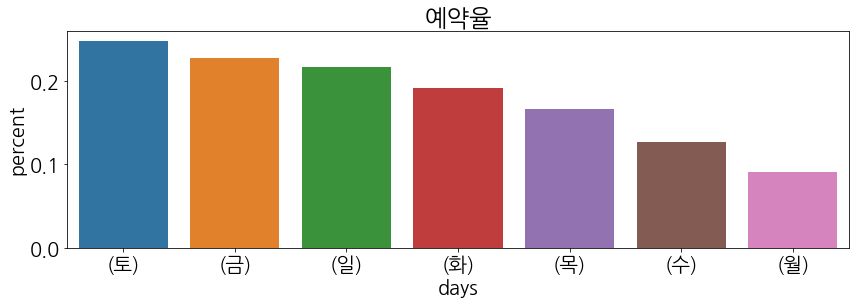

In [56]:
plt.title('예약율')
sns.barplot(data=aa, x=aa.index , y='percent')

### 강의의 숫자

In [57]:
df_edu.groupby(by='days')['title'].count().sort_values(ascending=False)

days
(토)    68
(화)    47
(일)    34
(수)    30
(목)    26
(월)    24
(금)    16
Name: title, dtype: int64

In [58]:
aa = df_edu.groupby(by='days')['title'].count().reset_index()

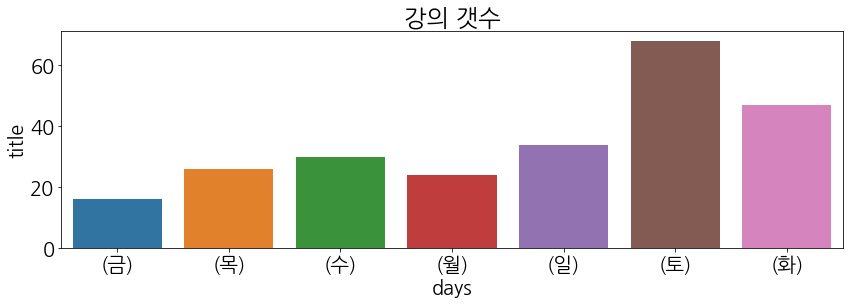

In [59]:
plt.title('강의 갯수')
sns.barplot(data=aa, x=aa['days'] , y=aa['title'])

### 참여하는 사람 숫자

In [60]:
df_edu.groupby(by='days')['available'].sum().sort_index(ascending=False)

days
(화)     492.0
(토)    1774.0
(일)     400.0
(월)     492.0
(수)     883.0
(목)     592.0
(금)     144.0
Name: available, dtype: float32

In [61]:
aa = df_edu.groupby(by='days')['sold'].sum().reset_index()

In [62]:
aa

,days,sold
0,(금),25.0
1,(목),49.0
2,(수),37.0
3,(월),35.0
4,(일),66.0
5,(토),159.0
6,(화),112.0


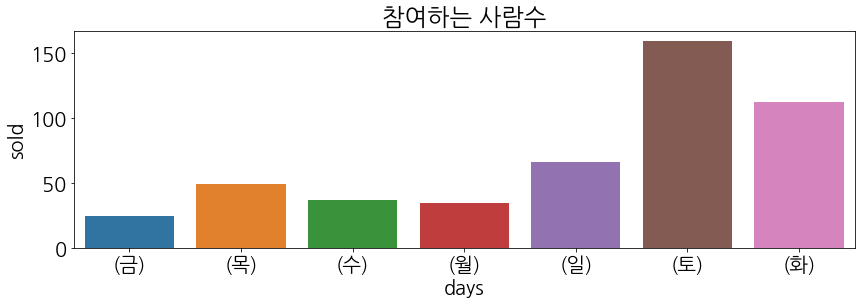

In [63]:
plt.title('참여하는 사람수')
sns.barplot(x=aa['days'], y=aa['sold'], data=aa)

### 총 좌석의 분포도

In [64]:
df_edu.groupby(by='days')['total'].sum().sort_values(ascending=False)

days
(토)    1933.0
(수)     920.0
(목)     641.0
(화)     604.0
(월)     527.0
(일)     466.0
(금)     169.0
Name: total, dtype: float32

In [65]:
aa = df_edu.groupby(by='days')['total'].sum().reset_index()

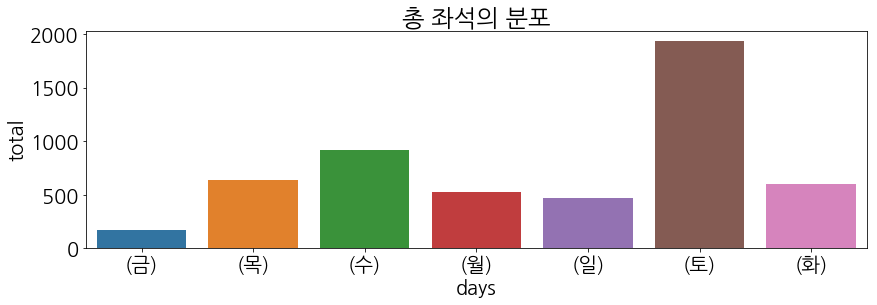

In [66]:
plt.title('총 좌석의 분포')
sns.barplot(data=aa, x=aa['days'], y=aa['total'])

강의 갯수는 **토->수->목->화 순서로 많음**

## 유/무료 강좌에

In [70]:
df_edu.groupby(by='pay')['percent'].mean()

pay
유료    0.192265
Name: percent, dtype: float32

## 유료 강좌

In [71]:
df_edu[df_edu['pay']=='유료'].groupby(by='days')['percent'].mean()

days
(금)    0.227083
(목)    0.166154
(수)    0.127222
(월)    0.091035
(일)    0.216176
(토)    0.247304
(화)    0.191135
Name: percent, dtype: float32

## 무료 강좌

In [72]:
df_edu[df_edu['pay']=='무료'].groupby(by='days')['percent'].mean()

Series([], Name: percent, dtype: float32)